In [82]:
import pandas as pd
from pathlib import Path

base_path = Path(r'C:\Users\David\Documents\Albert school\Carmila alberton\Data for the CARMILA challenge')
files = {
    "Informations": base_path / "0.CC_Informations.xlsx",
    "Flux_Quotidien": base_path / "1.Flux_CC_Quotidien_heure_par_heure.xlsx",
    "CA_Commercants": base_path / "2.CA_Commerçants_Mensuels_par_activité.xlsx",
    "Surfaces": base_path / "3.Surfaces_CC.xlsx",
    "Fermetures_Exceptionnelles": base_path / "4.Fermetures_Exceptionnelles_CC.xlsx",
    "Ouvertures_Exceptionnelles": base_path / "5.Ouvertures_Exceptionnelles_CC.xlsx",
    "Horaires_Dates": base_path / "6.Horaires_Dates_CC.xlsx"
}

In [83]:
# Load files with error handling
dataframes = {}
for name, path in files.items():
    try:
        dataframes[name] = pd.read_excel(path)
        print(f"Successfully loaded {name}: {dataframes[name].shape} rows x columns")
    except Exception as e:
        print(f"Error loading {name}: {str(e)}")

Successfully loaded Informations: (10, 15) rows x columns
Successfully loaded Flux_Quotidien: (175440, 9) rows x columns
Successfully loaded CA_Commercants: (6089, 9) rows x columns
Successfully loaded Surfaces: (11, 19) rows x columns
Successfully loaded Fermetures_Exceptionnelles: (137, 24) rows x columns
Successfully loaded Ouvertures_Exceptionnelles: (137, 50) rows x columns
Successfully loaded Horaires_Dates: (137, 10) rows x columns


Analyse de flux quotidien :

In [84]:
# Load the dataset
flux_quotidien = pd.read_excel(files["Flux_Quotidien"])


In [85]:
# 1.1 Basic Information
print("=== Dataset Shape ===")
print(f"Rows x Columns: {flux_quotidien.shape}")
print("\n=== Data Types ===")
print(flux_quotidien.dtypes)

=== Dataset Shape ===
Rows x Columns: (175440, 9)

=== Data Types ===
Jour                         object
heure                        object
Site                         object
Zone                         object
Entrées                     float64
Code ensemble immobilier     object
ID mall                       int64
Année                         int64
Mois                          int64
dtype: object


In [86]:
# 1.2 Missing Values Analysis
print("\n=== Missing Values Analysis ===")
missing_values = flux_quotidien.isnull().sum()
missing_percentages = (missing_values / len(flux_quotidien)) * 100
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentages
})
print(missing_info[missing_info['Missing Values'] > 0])



=== Missing Values Analysis ===
         Missing Values  Missing Percentage
Entrées              41             0.02337


In [87]:
# 1.3 Basic Statistics
print("\n=== Basic Statistics ===")
print(flux_quotidien.describe())


=== Basic Statistics ===
             Entrées        ID mall          Année           Mois
count  175399.000000  175440.000000  175440.000000  175440.000000
mean      440.525664      31.100000    2023.500684       6.519836
std       578.895357      20.510787       0.500001       3.449561
min         0.000000       5.000000    2023.000000       1.000000
25%         0.000000      11.000000    2023.000000       4.000000
50%        46.000000      28.500000    2024.000000       7.000000
75%       837.000000      47.000000    2024.000000      10.000000
max      4369.000000      71.000000    2024.000000      12.000000


c:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


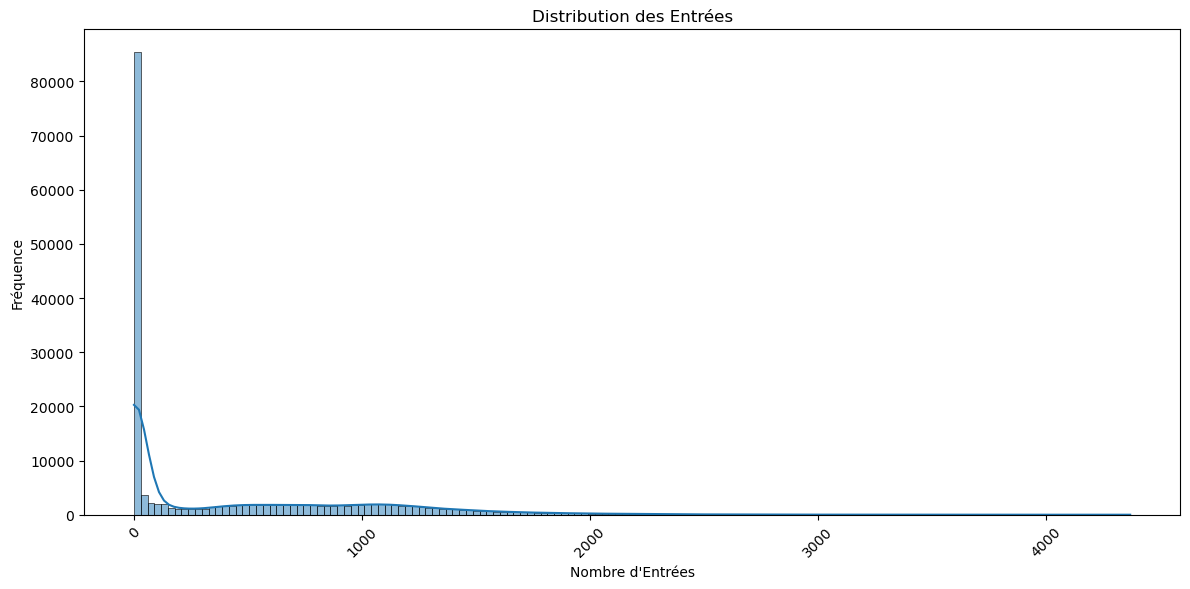

In [88]:
# Plot setup
plt.figure(figsize=(12, 6))
sns.histplot(data=flux_quotidien, x="Entrées", kde=True)
plt.title("Distribution des Entrées")
plt.xlabel("Nombre d'Entrées")
plt.ylabel("Fréquence")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [89]:
#  Look at rows with missing Entrées
print("\n=== Sample of Rows with Missing Entrées ===")
missing_entries = flux_quotidien[flux_quotidien['Entrées'].isnull()]
print(missing_entries)


=== Sample of Rows with Missing Entrées ===
              Jour          heure              Site               Zone  \
2018    2023-03-26  02:00 - 02:59           Antibes  Centre Commercial   
2020    2023-03-26  04:00 - 04:59           Antibes  Centre Commercial   
10922   2024-03-31  02:00 - 02:59           Antibes  Centre Commercial   
19562   2023-03-26  02:00 - 02:59             Bab 2  Centre Commercial   
19564   2023-03-26  04:00 - 04:59             Bab 2  Centre Commercial   
28466   2024-03-31  02:00 - 02:59             Bab 2  Centre Commercial   
30158   2024-06-09  14:00 - 14:59             Bab 2  Centre Commercial   
30159   2024-06-09  15:00 - 15:59             Bab 2  Centre Commercial   
46010   2024-03-31  02:00 - 02:59             Bay 2  Centre Commercial   
54650   2023-03-26  02:00 - 02:59            Cesson  Centre Commercial   
54652   2023-03-26  04:00 - 04:59            Cesson  Centre Commercial   
63554   2024-03-31  02:00 - 02:59            Cesson  Centre Commerc

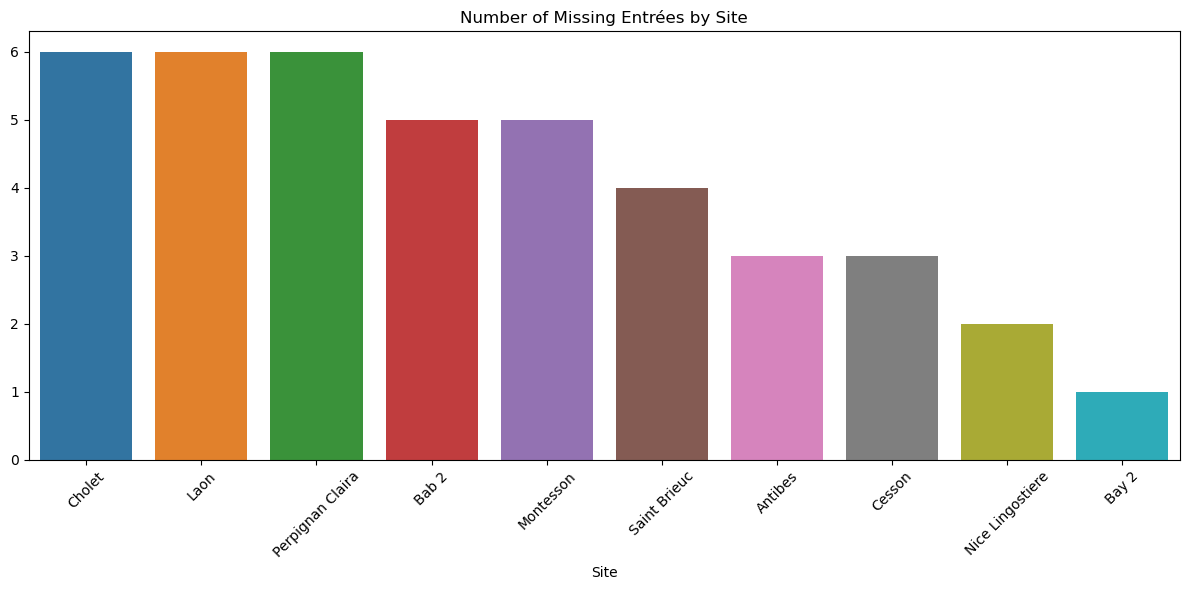

In [90]:
# Get rows with missing Entrées
missing_entries = flux_quotidien[flux_quotidien['Entrées'].isnull()]

# 1. Plot missing entries by Site
plt.figure(figsize=(12, 6))
missing_by_site = missing_entries['Site'].value_counts()
sns.barplot(x=missing_by_site.index, y=missing_by_site.values)
plt.title('Number of Missing Entrées by Site')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

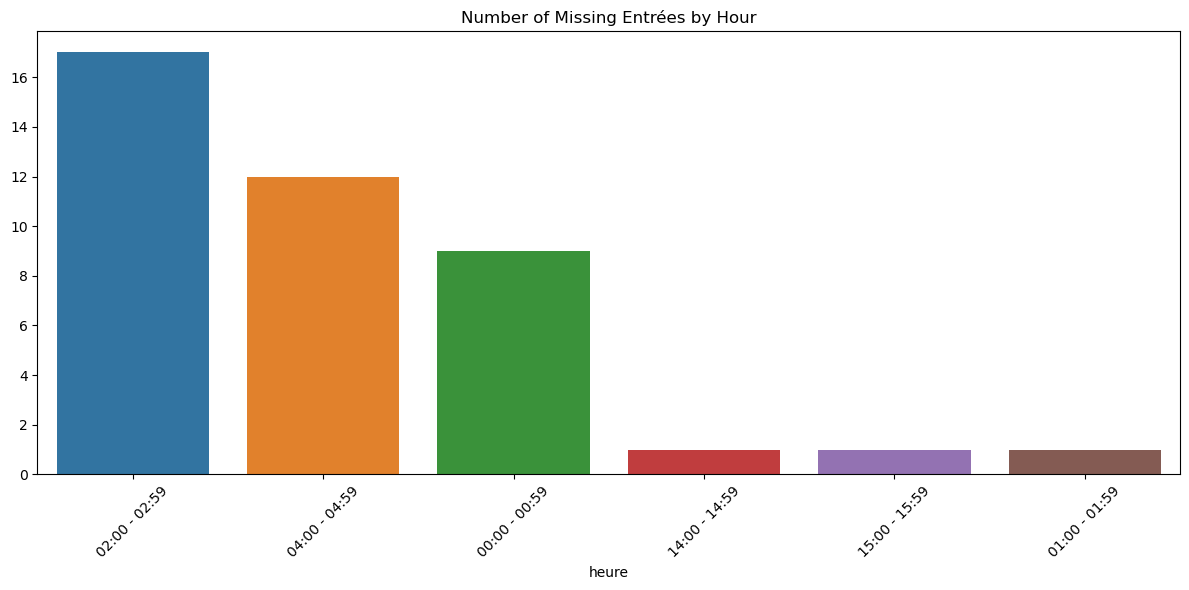

In [91]:
# 2. Plot missing entries by hour
plt.figure(figsize=(12, 6))
missing_by_hour = missing_entries['heure'].value_counts()
sns.barplot(x=missing_by_hour.index, y=missing_by_hour.values)
plt.title('Number of Missing Entrées by Hour')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\David\AppData\Local\Temp\ipykernel_18544\933187695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_entries['Jour'] = pd.to_datetime(missing_entries['Jour'])


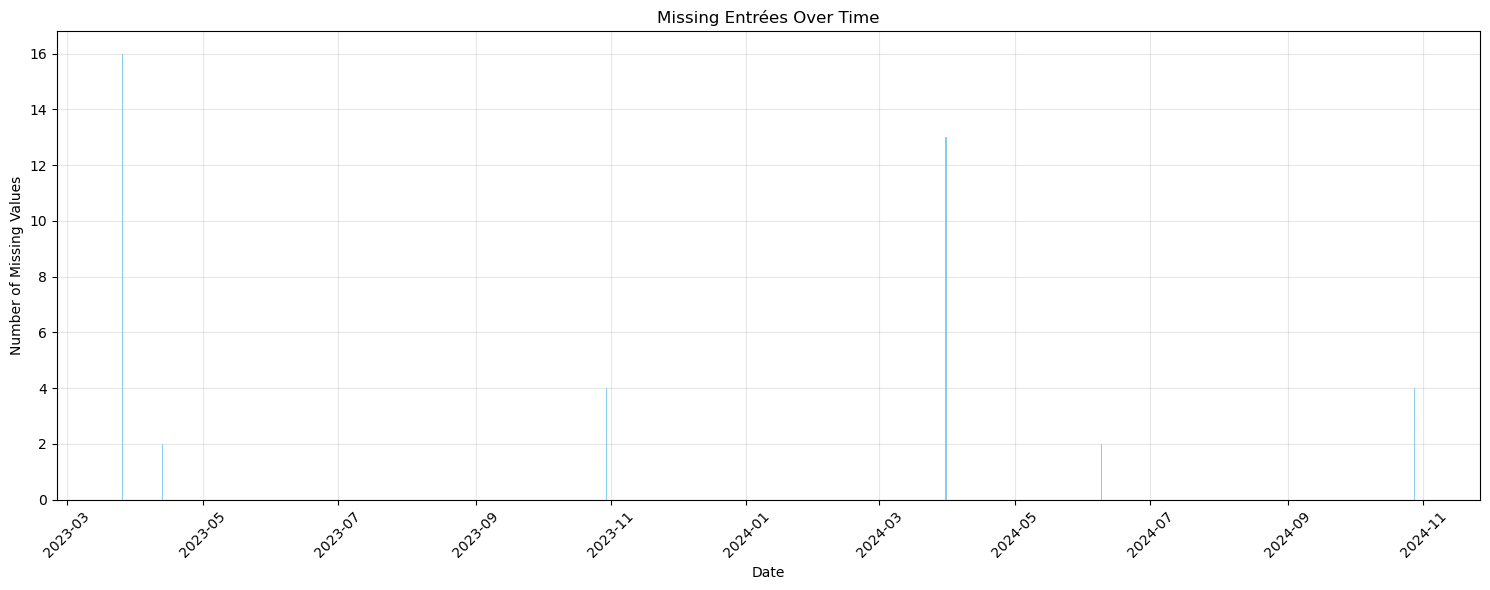

In [92]:
plt.figure(figsize=(15, 6))
missing_entries['Jour'] = pd.to_datetime(missing_entries['Jour'])
missing_by_date = missing_entries.groupby('Jour').size()

# Create bar plot
plt.bar(missing_by_date.index, missing_by_date.values, color='skyblue')
plt.title('Missing Entrées Over Time', fontsize=12)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Number of Missing Values', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Handling missing values, je vais remplacer les valeurs manquantes par la mediane à l'heure correspondante (médiane pour pas être impacter par les outliers)

=== Median des Entrées par heure ===
heure
00:00 - 00:59       0.0
01:00 - 01:59       0.0
02:00 - 02:59       0.0
03:00 - 03:59       0.0
04:00 - 04:59       0.0
05:00 - 05:59       0.0
06:00 - 06:59       8.0
07:00 - 07:59      14.0
08:00 - 08:59     246.0
09:00 - 09:59     670.0
10:00 - 10:59     946.0
11:00 - 11:59     991.0
12:00 - 12:59    1061.0
13:00 - 13:59     855.0
14:00 - 14:59     998.0
15:00 - 15:59    1085.0
16:00 - 16:59    1053.0
17:00 - 17:59    1035.5
18:00 - 18:59     900.0
19:00 - 19:59     498.5
20:00 - 20:59     150.0
21:00 - 21:59       6.0
22:00 - 22:59       0.0
23:00 - 23:59       0.0
Name: Entrées, dtype: float64


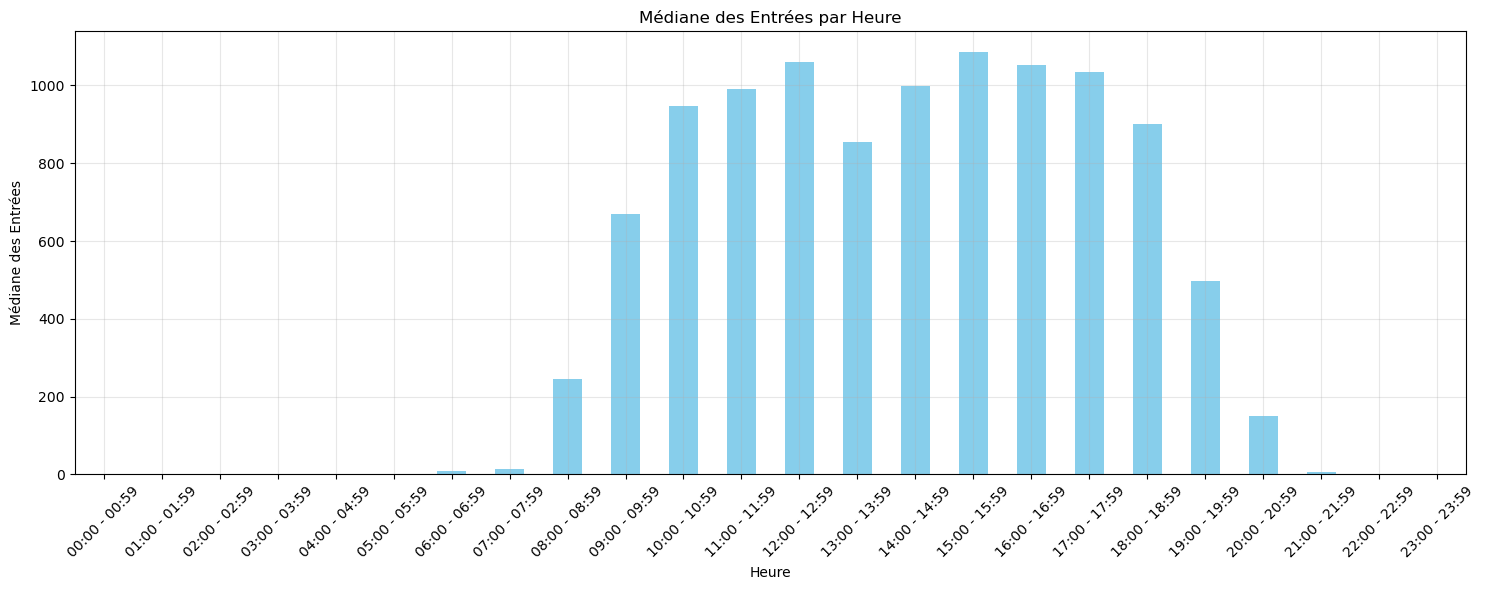

In [93]:
# Calculate median entries by hour
median_by_hour = flux_quotidien.groupby('heure')['Entrées'].median().sort_index()

# Display the numerical results
print("=== Median des Entrées par heure ===")
print(median_by_hour)

# Visualize with a bar plot
plt.figure(figsize=(15, 6))
median_by_hour.plot(kind='bar', color='skyblue')
plt.title('Médiane des Entrées par Heure', fontsize=12)
plt.xlabel('Heure', fontsize=10)
plt.ylabel('Médiane des Entrées', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== Vérification des valeurs manquantes ===
Nombre de valeurs manquantes avant: 41
Nombre de valeurs manquantes après: 0


c:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


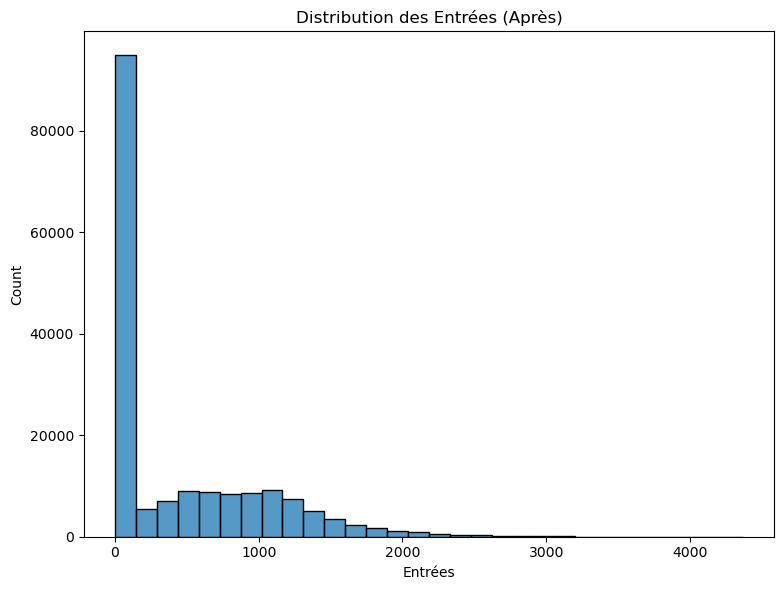

In [94]:
# Create a copy of the dataframe to keep the original data intact
flux_quotidien_clean = flux_quotidien.copy()

# Calculate median entries by hour
medians_by_hour = flux_quotidien.groupby('heure')['Entrées'].median()

# Replace missing values with corresponding hour median
for hour in flux_quotidien_clean['heure'].unique():
    hour_median = medians_by_hour[hour]
    mask = (flux_quotidien_clean['heure'] == hour) & (flux_quotidien_clean['Entrées'].isna())
    flux_quotidien_clean.loc[mask, 'Entrées'] = hour_median

# Verify the replacement
print("=== Vérification des valeurs manquantes ===")
print(f"Nombre de valeurs manquantes avant: {flux_quotidien['Entrées'].isna().sum()}")
print(f"Nombre de valeurs manquantes après: {flux_quotidien_clean['Entrées'].isna().sum()}")

# Optional: Visualize the distribution before and after
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 2)
sns.histplot(data=flux_quotidien_clean['Entrées'], bins=30)
plt.title('Distribution des Entrées (Après)')
plt.xlabel('Entrées')

plt.tight_layout()
plt.show()

Travail sur le DF flux clean maintenant

C:\Users\David\AppData\Local\Temp\ipykernel_18544\326271470.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000) + 'K' for x in current_values])


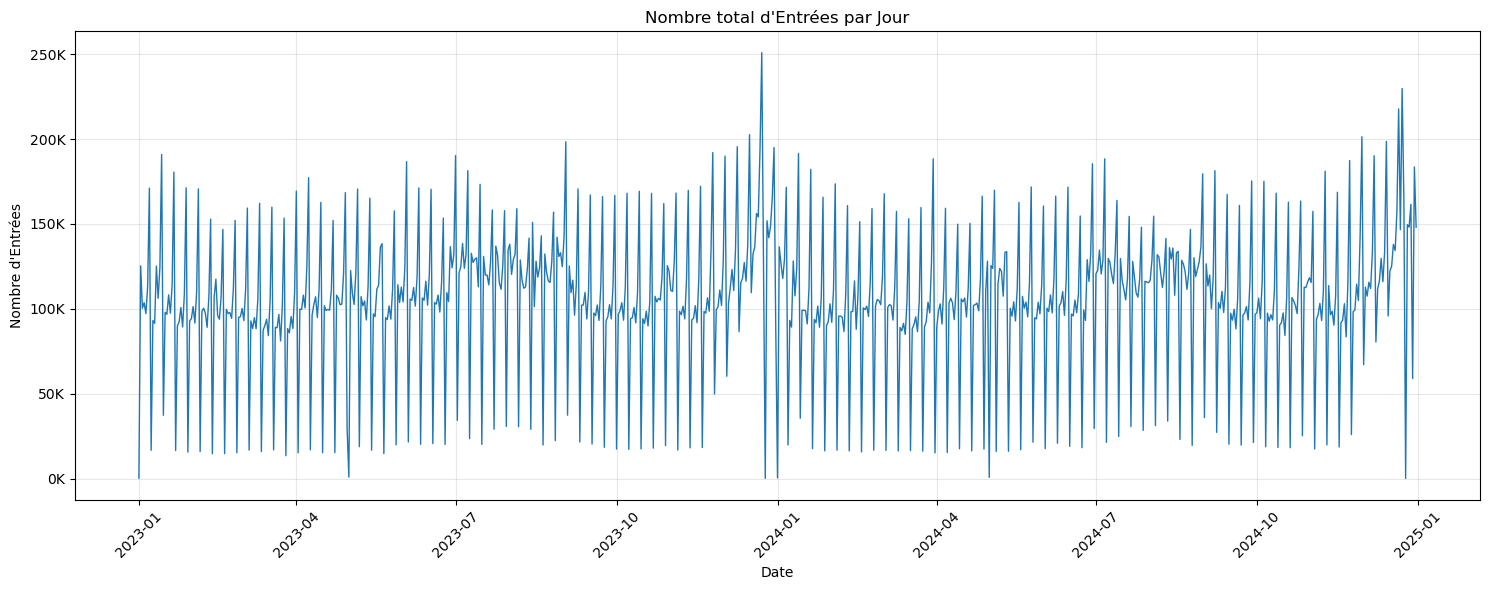

In [95]:
# Group by day and sum the entries
daily_entries = flux_quotidien_clean.groupby('Jour')['Entrées'].sum().reset_index()
daily_entries['Jour'] = pd.to_datetime(daily_entries['Jour'])

# Create the plot
plt.figure(figsize=(15, 6))
plt.plot(daily_entries['Jour'], daily_entries['Entrées'], linewidth=1)
plt.title('Nombre total d\'Entrées par Jour', fontsize=12)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Nombre d\'Entrées', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Format y-axis to show thousands with K
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000) + 'K' for x in current_values])

plt.tight_layout()
plt.show()


In [96]:
# Get the dates for min and max values
max_day = daily_entries.loc[daily_entries['Entrées'].idxmax()]
min_day = daily_entries.loc[daily_entries['Entrées'].idxmin()]

print("=== Statistiques des entrées journalières ===")
print(f"Moyenne journalière: {daily_entries['Entrées'].mean():,.0f} entrées")
print(f"Médiane journalière: {daily_entries['Entrées'].median():,.0f} entrées")
print(f"\nJour avec le maximum d'entrées: {max_day['Jour'].strftime('%d-%m-%Y')}")
print(f"Maximum journalier: {max_day['Entrées']:,.0f} entrées")
print(f"\nJour avec le minimum d'entrées: {min_day['Jour'].strftime('%d-%m-%Y')}")
print(f"Minimum journalier: {min_day['Entrées']:,.0f} entrées")

# Optional: Show the top 5 and bottom 5 days
print("\n=== Top 5 jours avec le plus d'entrées ===")
print(daily_entries.nlargest(5, 'Entrées')[['Jour', 'Entrées']].to_string())

print("\n=== Top 5 jours avec le moins d'entrées ===")
print(daily_entries.nsmallest(5, 'Entrées')[['Jour', 'Entrées']].to_string())

=== Statistiques des entrées journalières ===
Moyenne journalière: 105,704 entrées
Médiane journalière: 106,442 entrées

Jour avec le maximum d'entrées: 23-12-2023
Maximum journalier: 250,952 entrées

Jour avec le minimum d'entrées: 25-12-2024
Minimum journalier: 122 entrées

=== Top 5 jours avec le plus d'entrées ===
          Jour   Entrées
356 2023-12-23  250952.0
722 2024-12-23  229804.0
720 2024-12-21  217782.0
349 2023-12-16  202605.0
699 2024-11-30  201384.0

=== Top 5 jours avec le moins d'entrées ===
          Jour  Entrées
724 2024-12-25    122.0
358 2023-12-25    132.0
0   2023-01-01    292.0
365 2024-01-01    414.0
486 2024-05-01    715.0


In [97]:
# Optional: Check for very low entries (close to zero)
very_low_entries = daily_entries[daily_entries['Entrées'] < 1000]
if len(very_low_entries) > 0:
    print(f"\n=== Jours avec très peu d'entrées (<1000) (Total: {len(very_low_entries)} jours) ===")
    very_low_entries = very_low_entries.sort_values('Jour')
    for _, row in very_low_entries.iterrows():
        print(f"Date: {row['Jour'].strftime('%d-%m-%Y')} - Entrées: {row['Entrées']:.0f}")


=== Jours avec très peu d'entrées (<1000) (Total: 6 jours) ===
Date: 01-01-2023 - Entrées: 292
Date: 01-05-2023 - Entrées: 869
Date: 25-12-2023 - Entrées: 132
Date: 01-01-2024 - Entrées: 414
Date: 01-05-2024 - Entrées: 715
Date: 25-12-2024 - Entrées: 122


Correlation 

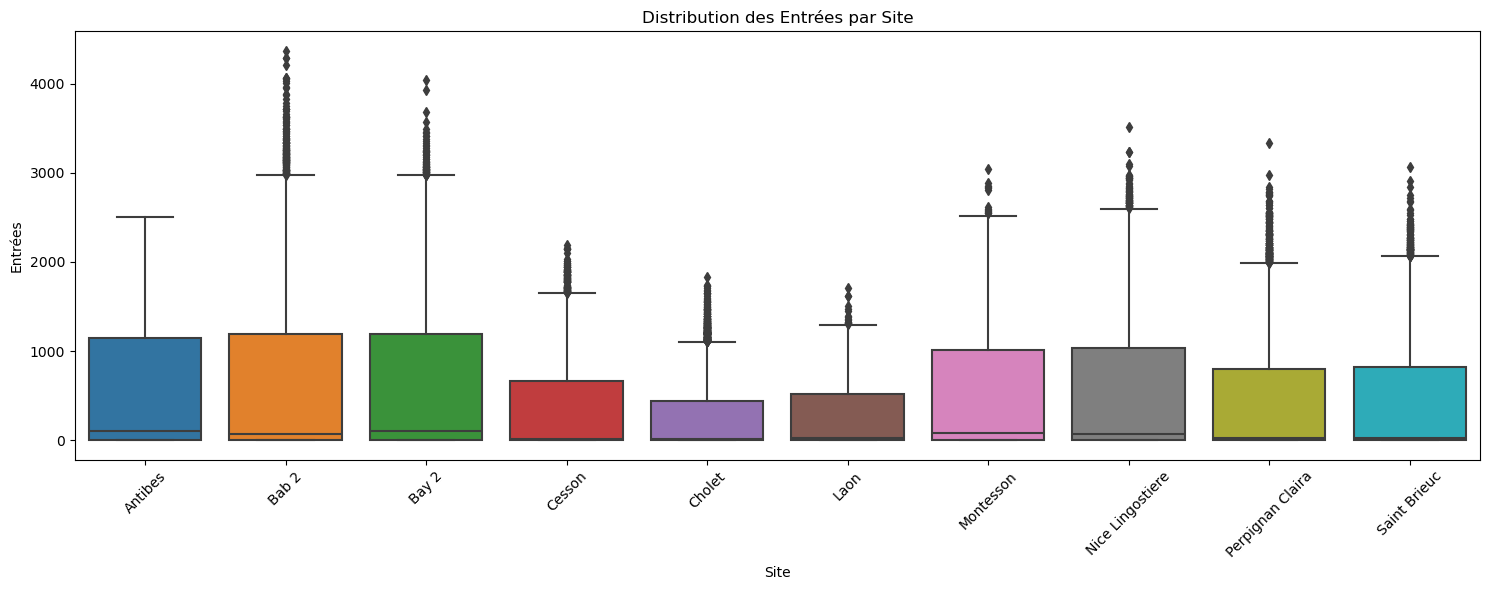

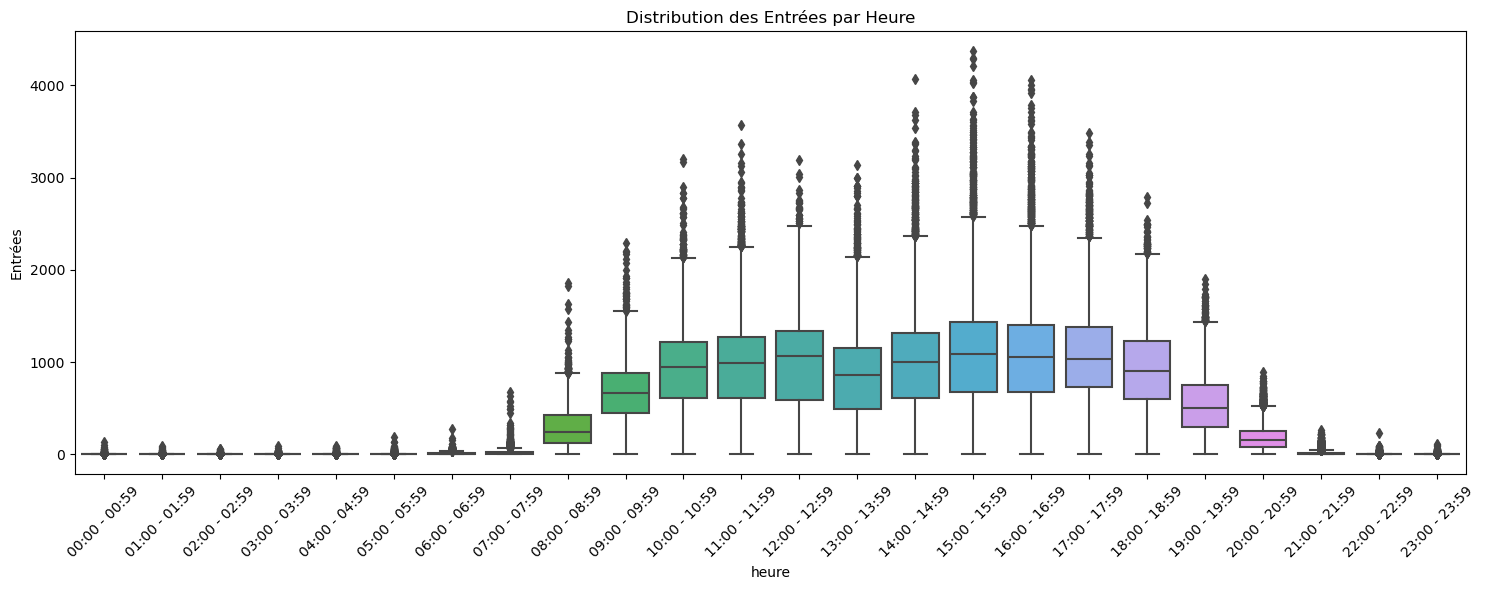

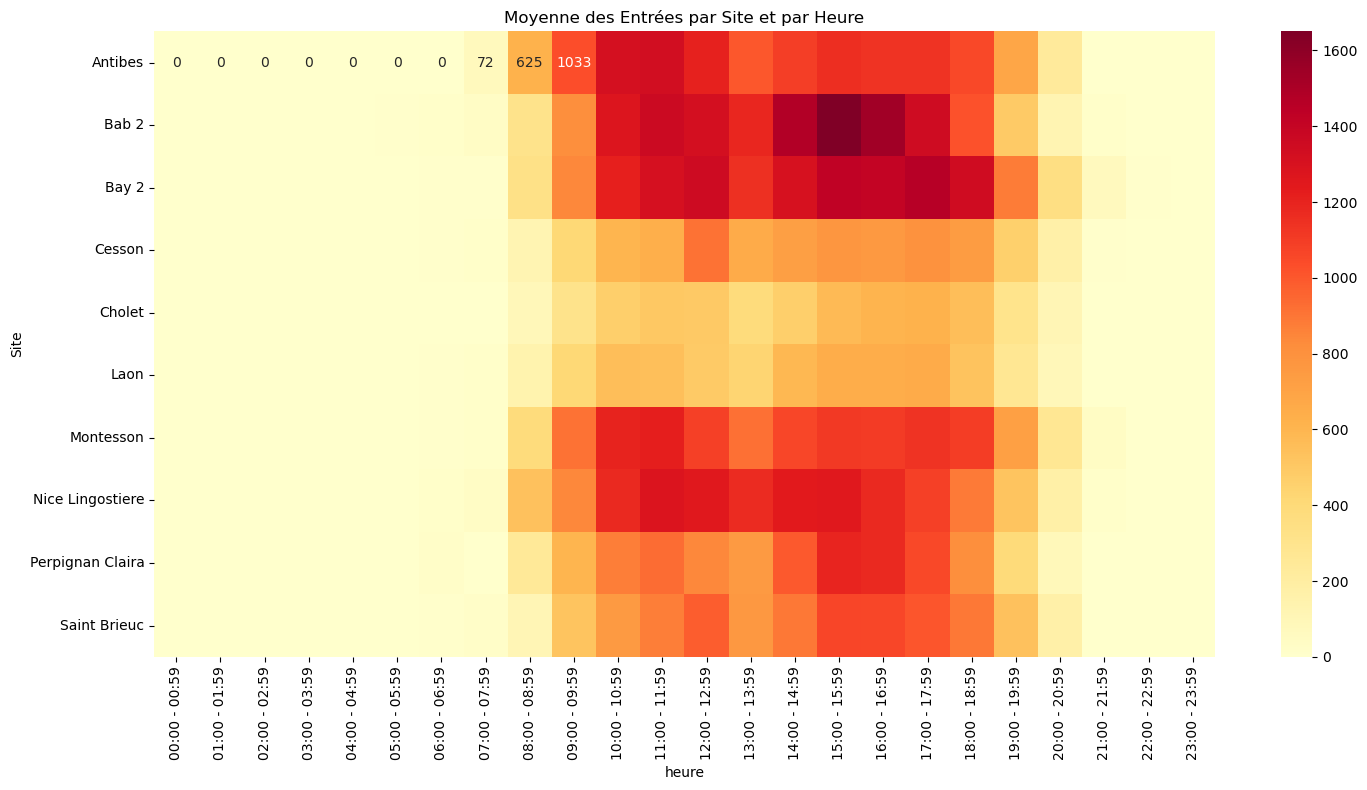

In [98]:
# Part : Correlation Analysis

# Create hour as numeric for correlation
flux_quotidien_clean['heure_num'] = flux_quotidien_clean['heure'].str.extract('(\d+)').astype(float)

# Box plot of Entries by Site
plt.figure(figsize=(15, 6))
sns.boxplot(data=flux_quotidien_clean, x='Site', y='Entrées')
plt.title('Distribution des Entrées par Site')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Entries by hour
plt.figure(figsize=(15, 6))
sns.boxplot(data=flux_quotidien_clean, x='heure', y='Entrées')
plt.title('Distribution des Entrées par Heure')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average entries by hour and site
plt.figure(figsize=(15, 8))
pivot_table = flux_quotidien_clean.pivot_table(
    values='Entrées', 
    index='Site', 
    columns='heure', 
    aggfunc='mean'
)
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Moyenne des Entrées par Site et par Heure')
plt.tight_layout()
plt.show()

Temporal analysis

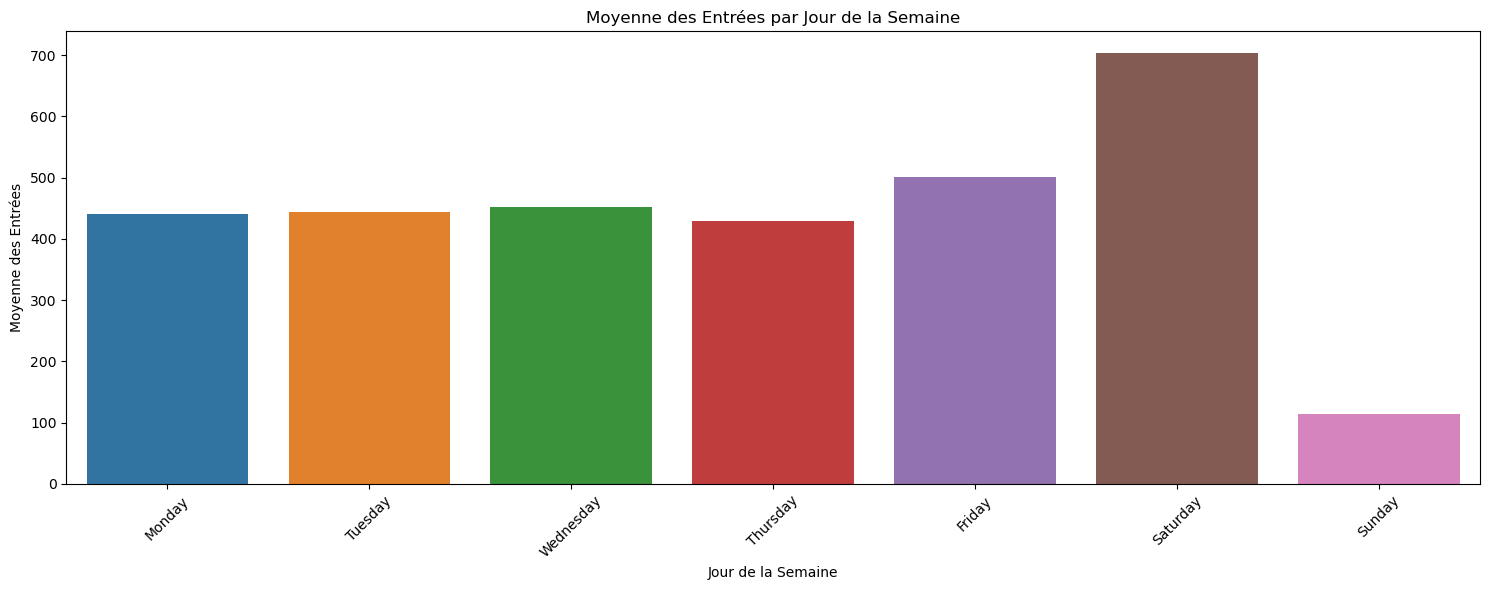

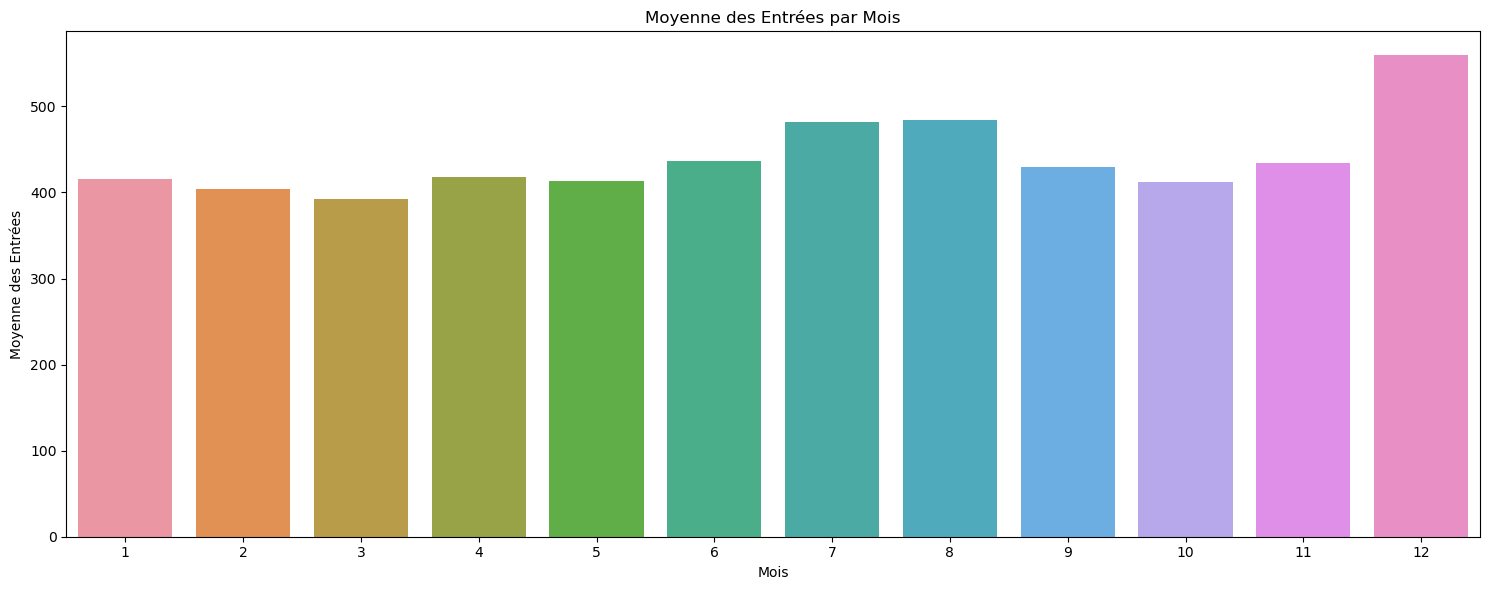

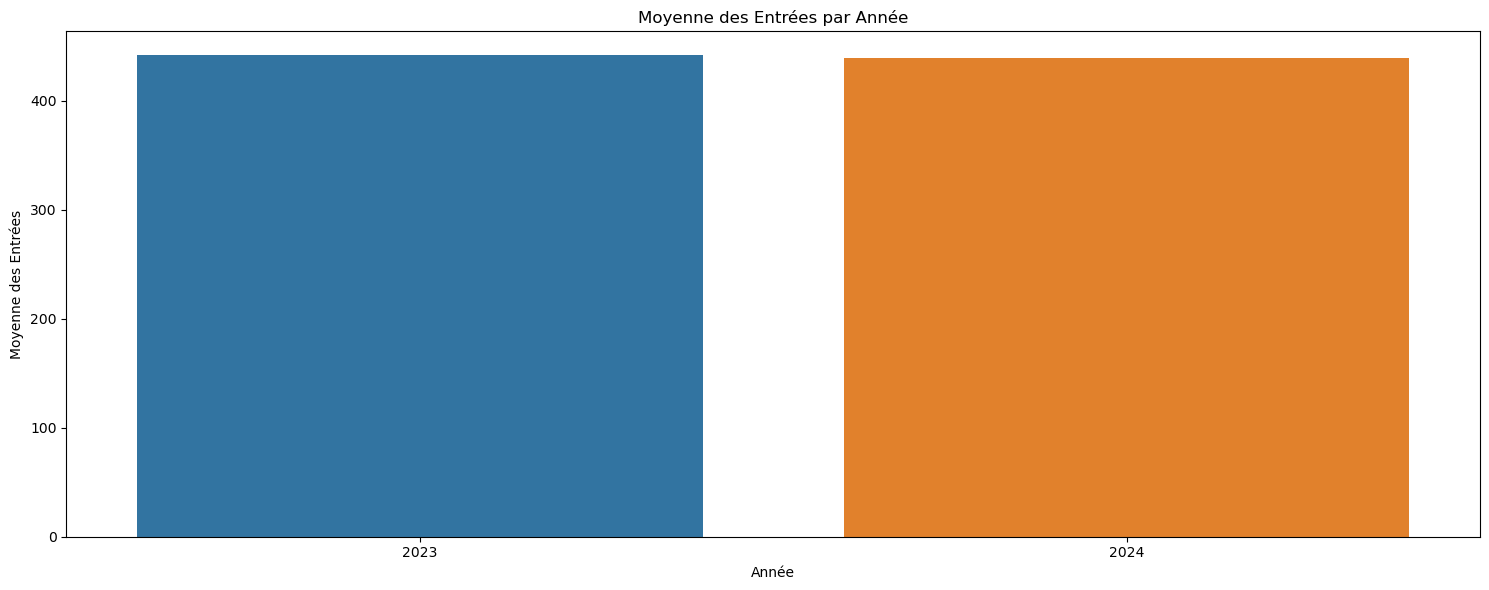

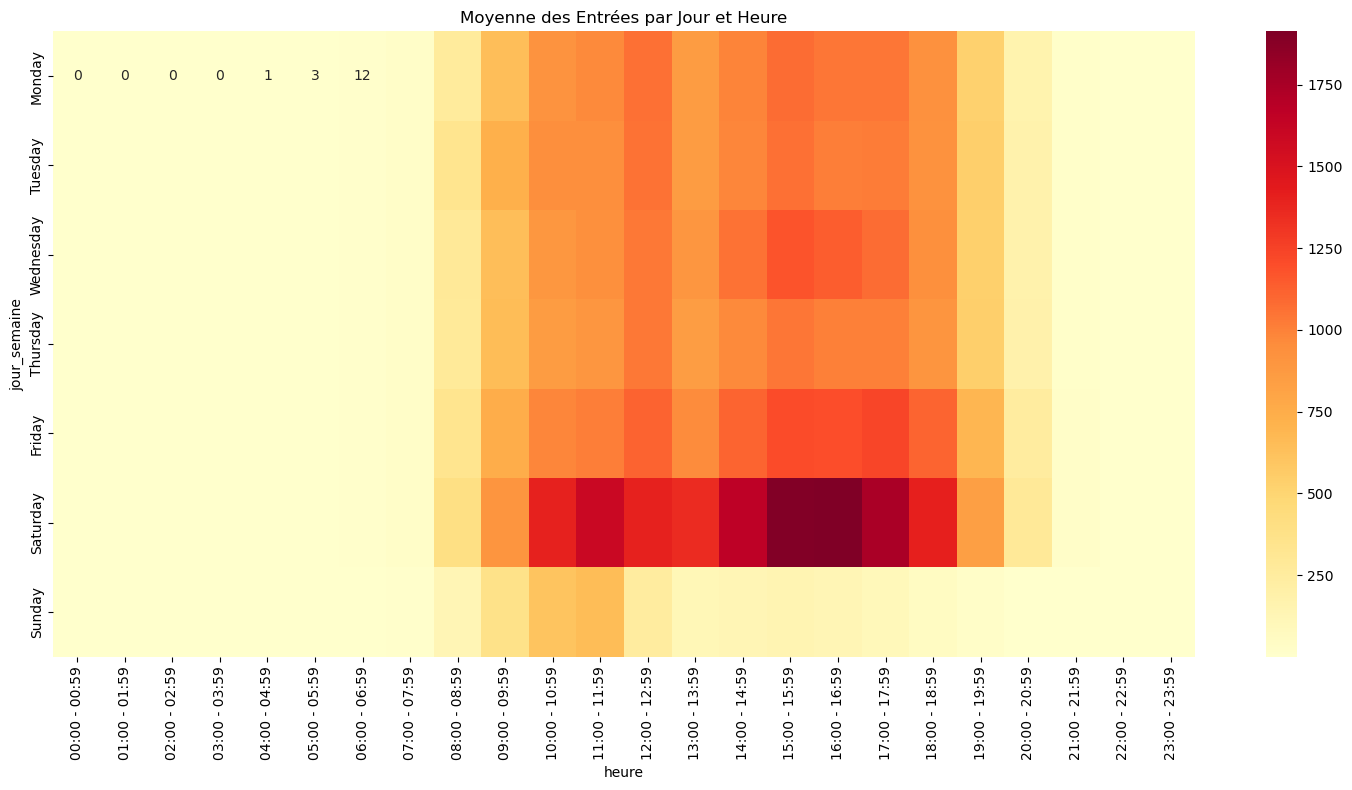

In [99]:
# Part : Temporal Analysis

# Add datetime components
flux_quotidien_clean['Jour'] = pd.to_datetime(flux_quotidien_clean['Jour'])
flux_quotidien_clean['jour_semaine'] = flux_quotidien_clean['Jour'].dt.day_name()
flux_quotidien_clean['mois'] = flux_quotidien_clean['Jour'].dt.month
flux_quotidien_clean['annee'] = flux_quotidien_clean['Jour'].dt.year

# 1. Analysis by Day of Week
plt.figure(figsize=(15, 6))
daily_avg = flux_quotidien_clean.groupby('jour_semaine')['Entrées'].mean()
# Reorder days
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg = daily_avg.reindex(order)
sns.barplot(x=daily_avg.index, y=daily_avg.values)
plt.title('Moyenne des Entrées par Jour de la Semaine')
plt.xlabel('Jour de la Semaine')
plt.ylabel('Moyenne des Entrées')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Monthly Analysis
plt.figure(figsize=(15, 6))
monthly_avg = flux_quotidien_clean.groupby('mois')['Entrées'].mean()
sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title('Moyenne des Entrées par Mois')
plt.xlabel('Mois')
plt.ylabel('Moyenne des Entrées')
plt.tight_layout()
plt.show()

# 3. Yearly Trend
plt.figure(figsize=(15, 6))
yearly_avg = flux_quotidien_clean.groupby('annee')['Entrées'].mean()
sns.barplot(x=yearly_avg.index, y=yearly_avg.values)
plt.title('Moyenne des Entrées par Année')
plt.xlabel('Année')
plt.ylabel('Moyenne des Entrées')
plt.tight_layout()
plt.show()

# 4. Heatmap: Day of Week vs Hour
plt.figure(figsize=(15, 8))
pivot_table = flux_quotidien_clean.pivot_table(
    values='Entrées',
    index='jour_semaine',
    columns='heure',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(order)  # Reorder days
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Moyenne des Entrées par Jour et Heure')
plt.tight_layout()
plt.show()

Spatial analysis

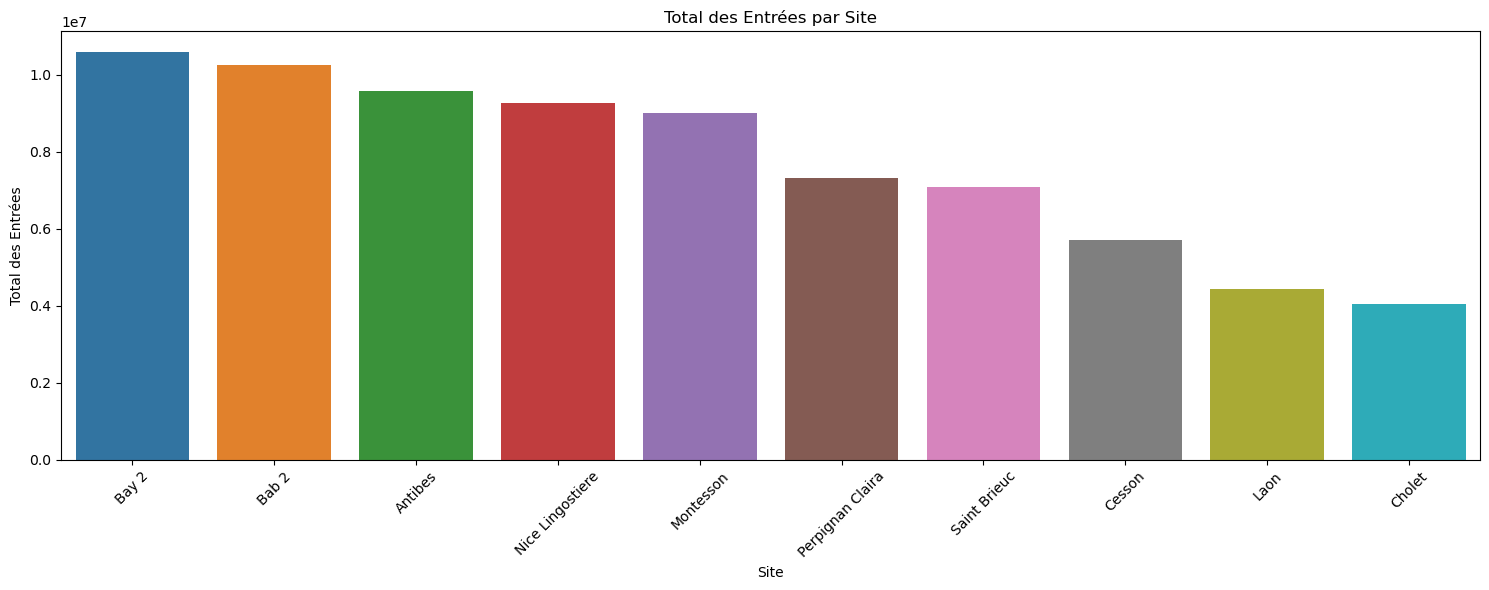

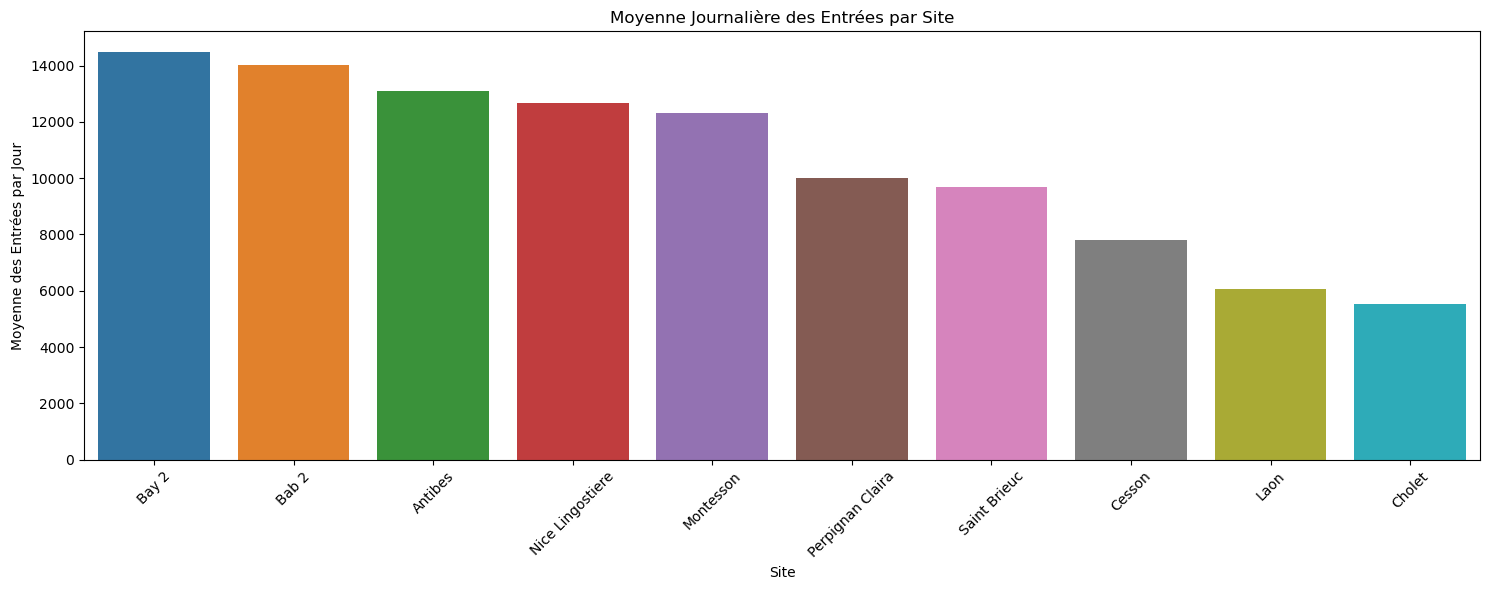

<Figure size 1500x600 with 0 Axes>

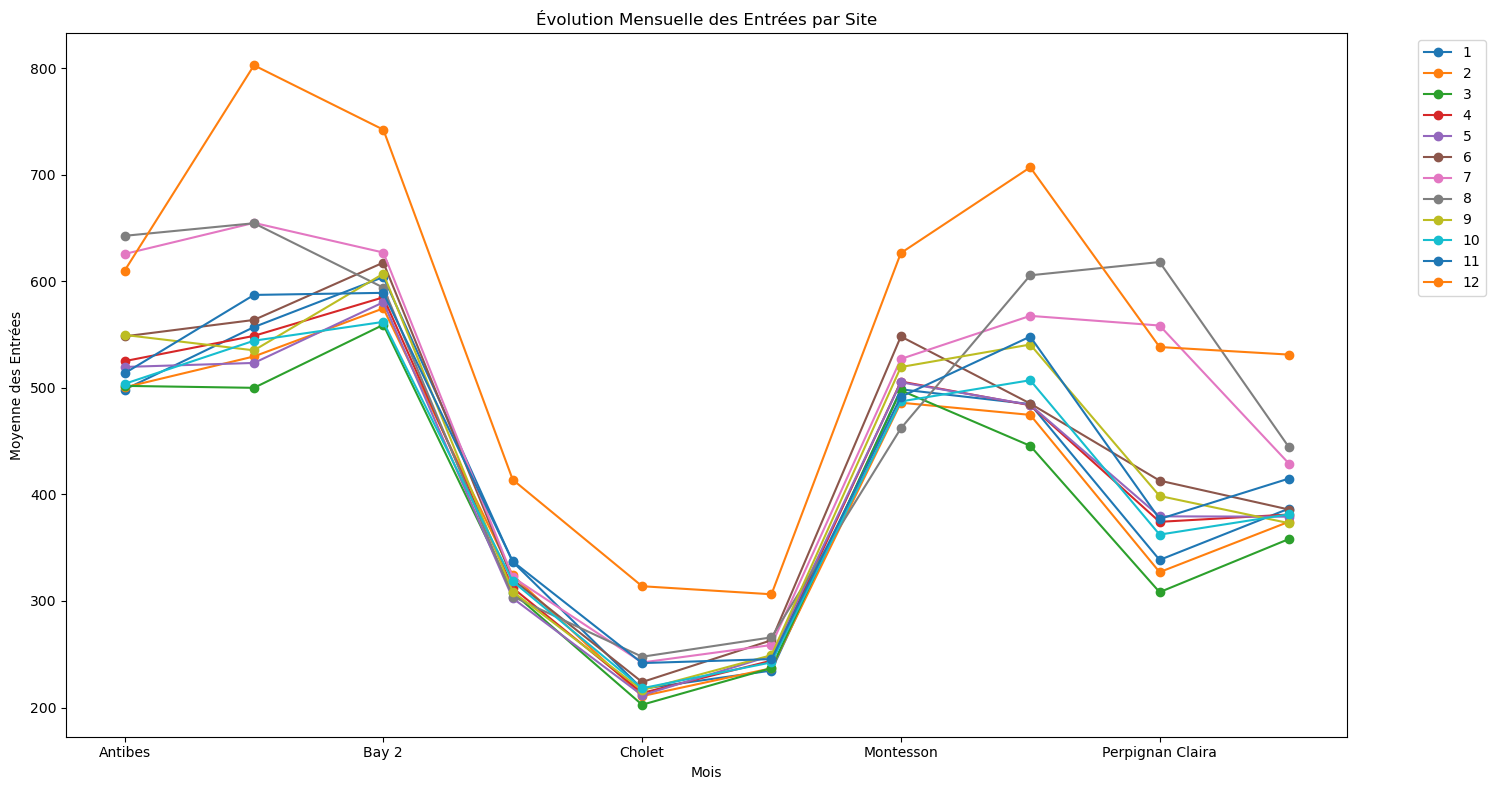

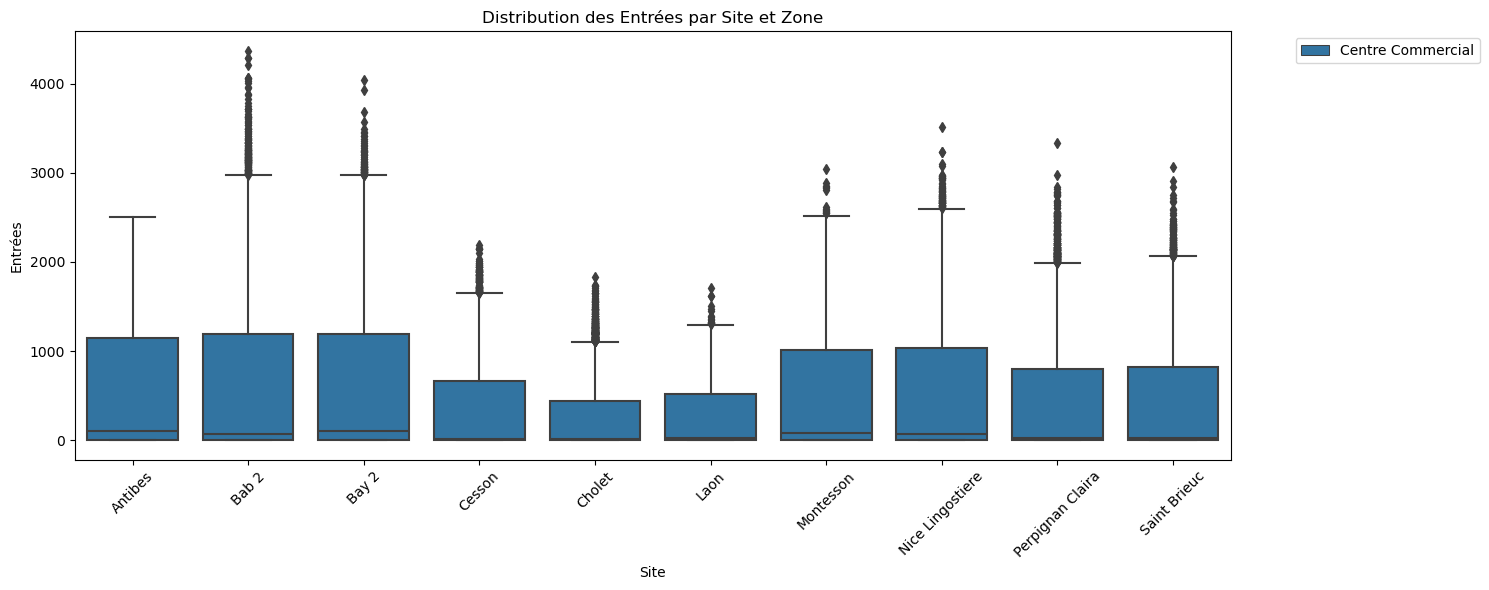


=== Statistiques par Site ===
                    mean  median     std  min     max
Site                                                 
Antibes           545.41   104.5  610.21  0.0  2506.0
Bab 2             584.13    64.0  757.36  0.0  4369.0
Bay 2             603.82    98.5  725.39  0.0  4036.0
Cesson            325.76    15.0  420.85  0.0  2186.0
Cholet            230.20    13.0  298.97  0.0  1829.0
Laon              252.82    22.5  309.26  0.0  1705.0
Montesson         513.17    83.0  603.45  0.0  3047.0
Nice Lingostiere  528.40    71.5  640.13  0.0  3512.0
Perpignan Claira  417.01    23.0  550.23  0.0  3332.0
Saint Brieuc      403.63    27.0  523.68  0.0  3060.0


In [100]:
# Part : Spatial Analysis

# 1. Total Entries by Site
plt.figure(figsize=(15, 6))
site_total = flux_quotidien_clean.groupby('Site')['Entrées'].sum().sort_values(ascending=False)
sns.barplot(x=site_total.index, y=site_total.values)
plt.title('Total des Entrées par Site')
plt.xlabel('Site')
plt.ylabel('Total des Entrées')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Average Daily Entries by Site
plt.figure(figsize=(15, 6))
site_daily_avg = flux_quotidien_clean.groupby(['Site', 'Jour'])['Entrées'].sum().groupby('Site').mean().sort_values(ascending=False)
sns.barplot(x=site_daily_avg.index, y=site_daily_avg.values)
plt.title('Moyenne Journalière des Entrées par Site')
plt.xlabel('Site')
plt.ylabel('Moyenne des Entrées par Jour')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Site Performance Over Time
plt.figure(figsize=(15, 6))
site_monthly = flux_quotidien_clean.groupby(['Site', 'mois'])['Entrées'].mean().unstack()
site_monthly.plot(marker='o')
plt.title('Évolution Mensuelle des Entrées par Site')
plt.xlabel('Mois')
plt.ylabel('Moyenne des Entrées')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. Box Plot by Site and Zone
plt.figure(figsize=(15, 6))
sns.boxplot(data=flux_quotidien_clean, x='Site', y='Entrées', hue='Zone')
plt.title('Distribution des Entrées par Site et Zone')
plt.xlabel('Site')
plt.ylabel('Entrées')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\n=== Statistiques par Site ===")
site_stats = flux_quotidien_clean.groupby('Site')['Entrées'].agg(['mean', 'median', 'std', 'min', 'max'])
print(site_stats.round(2))

On remarque 3 centres chelous, à voir ce quon fera

Analyse du fichier Fermetures_Exceptionnelles

1. Chargement et compréhension des données

In [101]:
import pandas as pd
import numpy as np

# Load the dataset
df_fermetures = pd.read_excel(files["Fermetures_Exceptionnelles"])

In [102]:
# Afficher les informations sur le DataFrame
print("\n=== Information sur le DataFrame ===")
print(df_fermetures.info())

# Afficher les premières lignes
print("\n=== Premières lignes du DataFrame ===")
print(df_fermetures.head())

# Afficher les noms des colonnes
print("\n=== Noms des colonnes ===")
print(df_fermetures.columns.tolist())


=== Information sur le DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Centre                137 non-null    object        
 1   Mall ID               77 non-null     float64       
 2   Clef Hyper Carrefour  75 non-null     object        
 3   0                     86 non-null     datetime64[ns]
 4   1                     61 non-null     datetime64[ns]
 5   2                     44 non-null     datetime64[ns]
 6   3                     31 non-null     datetime64[ns]
 7   4                     22 non-null     datetime64[ns]
 8   5                     18 non-null     datetime64[ns]
 9   6                     14 non-null     datetime64[ns]
 10  7                     8 non-null      datetime64[ns]
 11  8                     5 non-null      datetime64[ns]
 12  9                     4 non-null      da

In [103]:
# Compter le nombre de fermetures par centre
fermetures_par_centre = df_fermetures.groupby('Centre').size().sort_values(ascending=False)
print("\n=== Nombre de fermetures par centre ===")
print(fermetures_par_centre)


=== Nombre de fermetures par centre ===
Centre
 Centre commercial Carrefour Brest                     1
Centre commercial Carrefour Angoulins                  1
Centre Commercial Orléans Place d&#039;Arc             1
Centre Commercial Pince-Vent                           1
Centre Commercial Villejuif 7                          1
                                                      ..
Centre Commercial Carrefour Grenoble Meylan            1
Centre Commercial Carrefour Grenoble Echirolles        1
Centre Commercial Carrefour Grenoble - Saint-Egrève    1
Centre Commercial Carrefour Grand Vitrolles            1
Shop&#039;in Witty                                     1
Length: 137, dtype: int64


In [104]:
# Identifier les centres sans fermetures (si nous avons une liste complète des centres)
# Note: Cette partie suppose que nous avons une colonne 'Centre' avec tous les centres possibles
tous_les_centres = df_fermetures['Centre'].unique()
print("\n=== Liste de tous les centres ===")
print(tous_les_centres)


=== Liste de tous les centres ===
['Centre commercial Carrefour Lescar'
 'Centre commercial Carrefour Chambourcy'
 'Centre commercial Carrefour l&#039;Escapade'
 'Centre commercial Carrefour Rennes Cesson'
 'Centre Commercial Carrefour Douai Flers'
 'Centre Commercial Carrefour Annecy'
 'Centre Commercial Carrefour l&#039;Isle d&#039;Abeau'
 'Centre Commercial Carrefour Montesson'
 'Centre commercial Carrefour Nice Lingostière'
 'Centre commercial Carrefour Francheville'
 'Centre commercial Carrefour Villabé'
 'Centre commercial Carrefour Angoulins'
 'Centre commercial Les Sept Chemins' 'Centre Commercial Villejuif 7'
 'Centre commercial Cap Saran - Orléans'
 'Centre commercial Carrefour Salaise-sur-Sanne'
 'Centre Commercial Carrefour Langueux - Saint-Brieuc'
 'Centre Commercial Carrefour Cholet'
 'Centre Commercial Carrefour Angers - Saint-Serge'
 'Centre Commercial Carrefour Grenoble - Saint-Egrève'
 'Centre commercial Carrefour Bassens'
 'Centre Commercial Carrefour Hérouville'
 '

2. Nettoyage et pré-traitement

Convertir les dates de fermetures en format datetime pour une manipulation facile.
Réorganiser les données pour avoir une structure claire :
Chaque ligne représente une fermeture (centre et date associés).

In [105]:
# Afficher les colonnes et leurs types
print("=== Liste des colonnes ===")
print(df_fermetures.columns.tolist())
print("\n=== Types des colonnes ===")
print(df_fermetures.dtypes)

# Afficher quelques lignes pour voir le format
print("\n=== Exemple de données ===")
print(df_fermetures.head())

=== Liste des colonnes ===
['Centre', 'Mall ID', 'Clef Hyper Carrefour', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

=== Types des colonnes ===
Centre                          object
Mall ID                        float64
Clef Hyper Carrefour            object
0                       datetime64[ns]
1                       datetime64[ns]
2                       datetime64[ns]
3                       datetime64[ns]
4                       datetime64[ns]
5                       datetime64[ns]
6                       datetime64[ns]
7                       datetime64[ns]
8                       datetime64[ns]
9                       datetime64[ns]
10                      datetime64[ns]
11                      datetime64[ns]
12                      datetime64[ns]
13                      datetime64[ns]
14                      datetime64[ns]
15                      datetime64[ns]
16                      datetime64[ns]
17                      datetime64[ns]
18    

In [106]:
# Convertir le DataFrame en format long (melt) pour avoir une ligne par date de fermeture
df_fermetures_reorganise = pd.melt(
    df_fermetures,
    id_vars=['Centre', 'Mall ID', 'Clef Hyper Carrefour'],
    value_vars=[i for i in range(21)],  # colonnes 0 à 20 (en format integer)
    var_name='date_index',
    value_name='date_fermeture'
)

# Convertir les dates en format datetime
df_fermetures_reorganise['date_fermeture'] = pd.to_datetime(df_fermetures_reorganise['date_fermeture'], errors='coerce')

# Supprimer les lignes où la date est nulle
df_fermetures_reorganise = df_fermetures_reorganise.dropna(subset=['date_fermeture'])

# Supprimer l'index des dates qui n'est plus nécessaire
df_fermetures_reorganise = df_fermetures_reorganise.drop('date_index', axis=1)

# Réinitialiser l'index
df_fermetures_reorganise = df_fermetures_reorganise.reset_index(drop=True)

print("\n=== Dataset réorganisé ===")
print(df_fermetures_reorganise.head())
print("\nNombre total de fermetures :", len(df_fermetures_reorganise))


=== Dataset réorganisé ===
                                        Centre  Mall ID Clef Hyper Carrefour  \
0           Centre commercial Carrefour Lescar      2.0            FR0100043   
1       Centre commercial Carrefour Chambourcy      3.0            FR0107312   
2  Centre commercial Carrefour l&#039;Escapade      4.0            FR0100156   
3    Centre commercial Carrefour Rennes Cesson      5.0            FR0100522   
4      Centre Commercial Carrefour Douai Flers      6.0            FR0100062   

  date_fermeture  
0     2024-12-25  
1     2024-11-24  
2     2024-11-01  
3     2024-11-01  
4     2024-12-25  

Nombre total de fermetures : 313


Analyse descriptive

In [107]:
# 1. Statistiques globales
print("=== Statistiques Globales ===")
total_fermetures = len(df_fermetures_reorganise)
nb_centres = df_fermetures_reorganise['Centre'].nunique()
moyenne_fermetures = total_fermetures / nb_centres

print(f"Nombre total de fermetures exceptionnelles : {total_fermetures}")
print(f"Nombre de centres : {nb_centres}")
print(f"Moyenne de fermetures par centre : {moyenne_fermetures:.2f}")

# 2. Répartition temporelle
print("\n=== Répartition temporelle des fermetures ===")
# Par année
fermetures_par_annee = df_fermetures_reorganise['date_fermeture'].dt.year.value_counts().sort_index()
print("\nFermetures par année :")
print(fermetures_par_annee)

# Par mois (tous années confondues)
fermetures_par_mois = df_fermetures_reorganise['date_fermeture'].dt.month.value_counts().sort_index()
print("\nFermetures par mois (toutes années confondues) :")
print(fermetures_par_mois)

# Par année et mois
fermetures_par_annee_mois = df_fermetures_reorganise.groupby([
    df_fermetures_reorganise['date_fermeture'].dt.year,
    df_fermetures_reorganise['date_fermeture'].dt.month
]).size().sort_index()
print("\nFermetures par année et mois :")
print(fermetures_par_annee_mois)

# 3. Analyse par centre
print("\n=== Analyse par centre ===")
# Top 10 des centres les plus impactés
top_centres = df_fermetures_reorganise['Centre'].value_counts().head(10)
print("\nTop 10 des centres avec le plus de fermetures :")
print(top_centres)

# Vérifier les centres sans fermeture
tous_les_centres = df_fermetures['Centre'].unique()
centres_avec_fermetures = df_fermetures_reorganise['Centre'].unique()
centres_sans_fermeture = set(tous_les_centres) - set(centres_avec_fermetures)

print("\nCentres sans fermeture :")
if len(centres_sans_fermeture) > 0:
    print(list(centres_sans_fermeture))
else:
    print("Tous les centres ont au moins une fermeture.")

# 4. Statistiques supplémentaires
print("\n=== Statistiques supplémentaires ===")
# Distribution du nombre de fermetures par centre
stats_par_centre = df_fermetures_reorganise.groupby('Centre').size().describe()
print("\nDistribution du nombre de fermetures par centre :")
print(stats_par_centre)

=== Statistiques Globales ===
Nombre total de fermetures exceptionnelles : 313
Nombre de centres : 86
Moyenne de fermetures par centre : 3.64

=== Répartition temporelle des fermetures ===

Fermetures par année :
date_fermeture
2024    236
2025     77
Name: count, dtype: int64

Fermetures par mois (toutes années confondues) :
date_fermeture
1      57
4       2
5      27
6       6
7      19
8      20
9       7
11     43
12    132
Name: count, dtype: int64

Fermetures par année et mois :
date_fermeture  date_fermeture
2024            5                  22
                6                   4
                7                  17
                8                  19
                9                   7
                11                 42
                12                125
2025            1                  57
                4                   2
                5                   5
                6                   2
                7                   2
                8     

Identifier les périodes (mois ou jours spécifiques) avec une concentration élevée de fermetures.
Analyser les jours spécifiques (e.g., jours fériés ou weekends).
Visualiser les fermetures exceptionnelles :
Un histogramme ou une série temporelle des fermetures par mois ou par jour.

=== Analyse par jour de la semaine ===


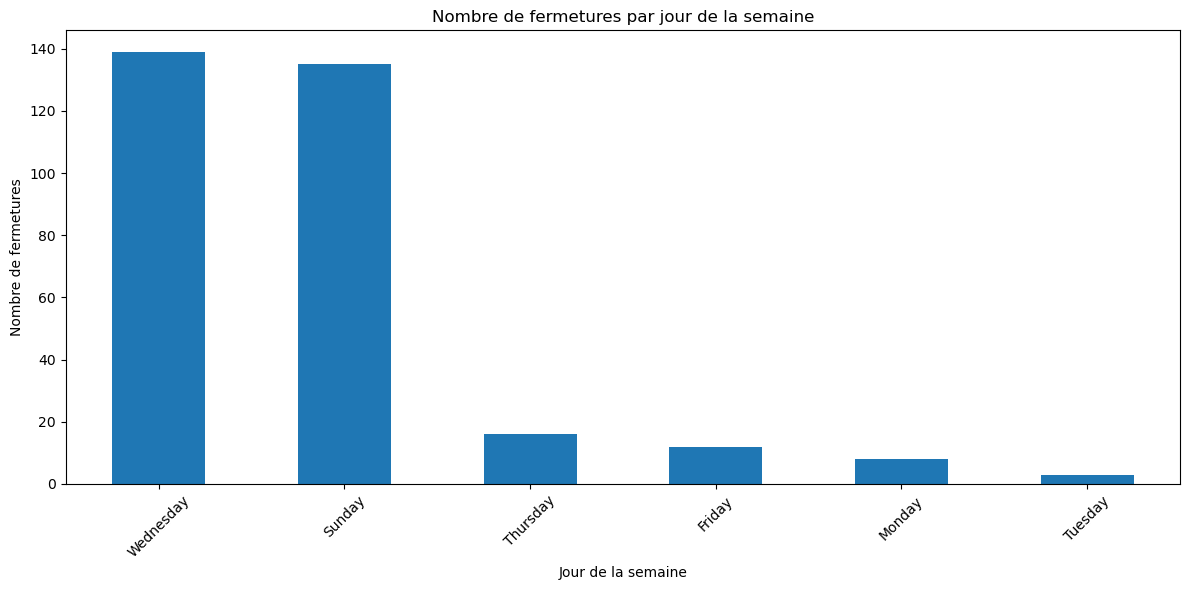

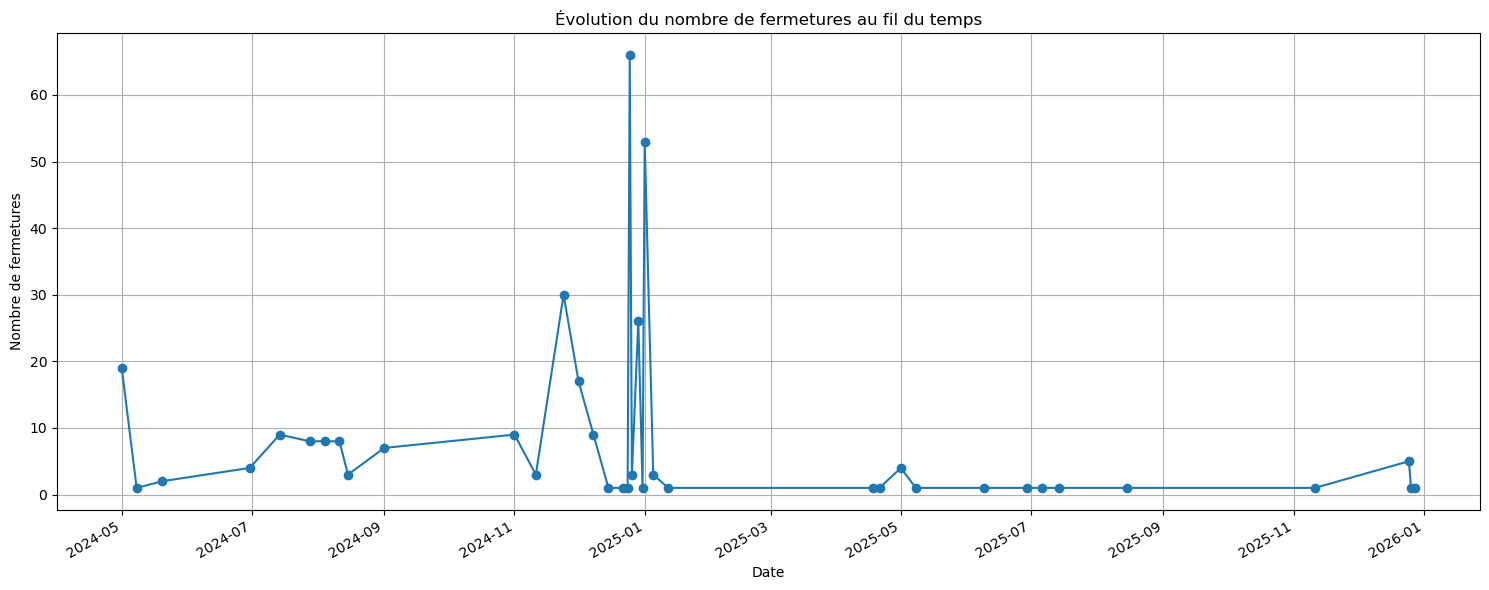

c:\Users\David\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


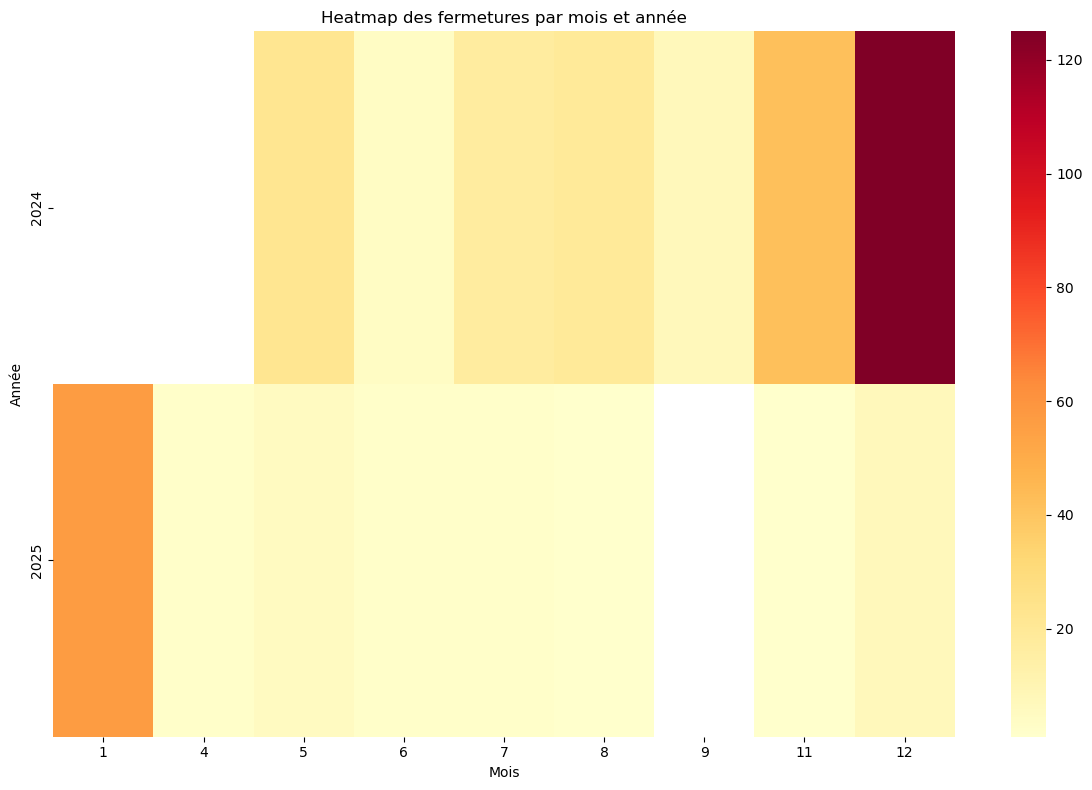


=== Top 10 des jours avec le plus de fermetures ===
date_fermeture
2024-12-25    66
2025-01-01    53
2024-11-24    30
2024-12-29    26
2024-05-01    19
2024-12-01    17
2024-07-14     9
2024-11-01     9
2024-12-08     9
2024-07-28     8
dtype: int64

=== Analyse des jours fériés ===

Répartition des fermetures (jours fériés vs. jours normaux):
jour_ferie
True     176
False    137
Name: count, dtype: int64


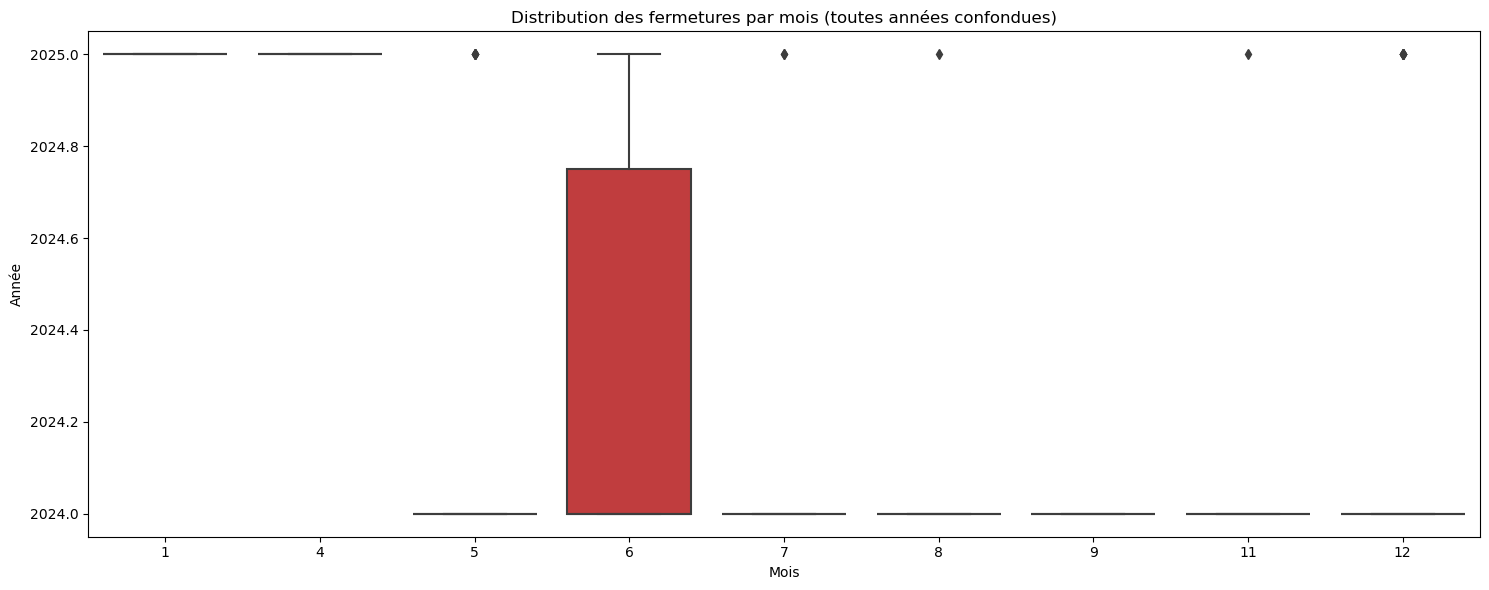


=== Périodes de forte concentration ===

Jours avec une concentration anormalement élevée (> moyenne + 2*écart-type):
date_fermeture
2024-12-25    66
2025-01-01    53
dtype: int64


In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuration simple des graphiques
plt.rcParams['figure.figsize'] = (15, 8)

# 1. Analyse des jours de la semaine
print("=== Analyse par jour de la semaine ===")
df_fermetures_reorganise['jour_semaine'] = df_fermetures_reorganise['date_fermeture'].dt.day_name()
fermetures_par_jour = df_fermetures_reorganise['jour_semaine'].value_counts()

# Visualisation des fermetures par jour de la semaine
plt.figure(figsize=(12, 6))
fermetures_par_jour.plot(kind='bar')
plt.title('Nombre de fermetures par jour de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre de fermetures')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Analyse temporelle détaillée
# Créer une série temporelle avec le nombre de fermetures par jour
fermetures_quotidiennes = df_fermetures_reorganise.groupby('date_fermeture').size()

# Visualisation de la série temporelle
plt.figure(figsize=(15, 6))
fermetures_quotidiennes.plot(kind='line', marker='o')
plt.title('Évolution du nombre de fermetures au fil du temps')
plt.xlabel('Date')
plt.ylabel('Nombre de fermetures')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Heatmap des fermetures par mois et année
df_fermetures_reorganise['annee'] = df_fermetures_reorganise['date_fermeture'].dt.year
df_fermetures_reorganise['mois'] = df_fermetures_reorganise['date_fermeture'].dt.month

heatmap_data = df_fermetures_reorganise.groupby(['annee', 'mois']).size().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlOrRd')
plt.title('Heatmap des fermetures par mois et année')
plt.xlabel('Mois')
plt.ylabel('Année')
plt.tight_layout()
plt.show()

# 4. Identification des jours avec le plus de fermetures
print("\n=== Top 10 des jours avec le plus de fermetures ===")
top_jours = fermetures_quotidiennes.sort_values(ascending=False).head(10)
print(top_jours)

# 5. Analyse des jours fériés
def est_jour_ferie(date):
    jours_feries = [
        f"{date.year}-01-01",  # Jour de l'an
        f"{date.year}-05-01",  # Fête du travail
        f"{date.year}-05-08",  # Victoire 1945
        f"{date.year}-07-14",  # Fête nationale
        f"{date.year}-08-15",  # Assomption
        f"{date.year}-11-01",  # Toussaint
        f"{date.year}-11-11",  # Armistice
        f"{date.year}-12-25",  # Noël
    ]
    return date.strftime('%Y-%m-%d') in jours_feries

df_fermetures_reorganise['jour_ferie'] = df_fermetures_reorganise['date_fermeture'].apply(est_jour_ferie)

print("\n=== Analyse des jours fériés ===")
fermetures_jours_feries = df_fermetures_reorganise['jour_ferie'].value_counts()
print("\nRépartition des fermetures (jours fériés vs. jours normaux):")
print(fermetures_jours_feries)

# 6. Distribution mensuelle
plt.figure(figsize=(15, 6))
sns.boxplot(x='mois', y='annee', data=df_fermetures_reorganise)
plt.title('Distribution des fermetures par mois (toutes années confondues)')
plt.xlabel('Mois')
plt.ylabel('Année')
plt.tight_layout()
plt.show()

# 7. Statistiques des périodes de forte concentration
print("\n=== Périodes de forte concentration ===")
mean_fermetures = fermetures_quotidiennes.mean()
std_fermetures = fermetures_quotidiennes.std()
seuil_forte_concentration = mean_fermetures + 2 * std_fermetures

jours_forte_concentration = fermetures_quotidiennes[fermetures_quotidiennes > seuil_forte_concentration]
print(f"\nJours avec une concentration anormalement élevée (> moyenne + 2*écart-type):")
print(jours_forte_concentration.sort_values(ascending=False))

5. Intégration avec le dataset principal
Créer une colonne binaire dans Flux_CC_Quotidien :
fermeture_exceptionnelle : Marque les dates correspondant à une fermeture exceptionnelle (1 si fermé, 0 sinon).
Vérifier l'impact des fermetures sur les flux (Entrées) :
Calculer la moyenne des flux avant et après les fermetures exceptionnelles.

In [109]:
def create_fermeture_column(df_flux, df_fermetures):
    # Convertir les IDs au même format (integer) en ignorant les NaN
    df_fermetures = df_fermetures.copy()
    df_fermetures = df_fermetures.dropna(subset=['Mall ID'])
    df_fermetures['Mall ID'] = df_fermetures['Mall ID'].astype(int)
    
    # S'assurer que les dates sont au bon format
    df_flux_dates = pd.to_datetime(df_flux['Jour'])
    df_fermetures_dates = pd.to_datetime(df_fermetures['date_fermeture'])
    
    print("\n=== Vérification des dates ===")
    print("Plage de dates flux:", df_flux_dates.min(), "à", df_flux_dates.max())
    print("Plage de dates fermetures:", df_fermetures_dates.min(), "à", df_fermetures_dates.max())
    
    # Filtrer les fermetures pour ne garder que celles qui correspondent à la plage de dates du flux
    mask_dates = (df_fermetures_dates >= df_flux_dates.min()) & (df_fermetures_dates <= df_flux_dates.max())
    df_fermetures = df_fermetures[mask_dates]
    df_fermetures_dates = df_fermetures_dates[mask_dates]
    
    print("\nNombre de fermetures dans la plage de dates:", len(df_fermetures))
    
    # Créer un DataFrame avec toutes les combinaisons de dates et centres
    df_fermetures_binary = pd.DataFrame({
        'ID mall': df_flux['ID mall'],
        'Jour': df_flux_dates
    })
    
    # Créer une clé unique pour le merge en utilisant les dates complètes
    df_fermetures['date_centre'] = df_fermetures_dates.dt.strftime('%Y-%m-%d') + '_' + df_fermetures['Mall ID'].astype(str)
    df_fermetures_binary['date_centre'] = df_fermetures_binary['Jour'].dt.strftime('%Y-%m-%d') + '_' + df_fermetures_binary['ID mall'].astype(str)
    
    print("\n=== Vérification des correspondances ===")
    print("IDs dans flux:", sorted(df_flux['ID mall'].unique()))
    print("IDs dans fermetures filtrées:", sorted(df_fermetures['Mall ID'].unique()))
    
    # Vérifier les correspondances spécifiques
    common_ids = set(df_flux['ID mall'].unique()) & set(df_fermetures['Mall ID'].unique())
    print("\nIDs communs:", sorted(common_ids))
    
    # Marquer les fermetures
    matches = df_fermetures_binary['date_centre'].isin(df_fermetures['date_centre'])
    print("\nNombre de correspondances trouvées:", matches.sum())
    
    if matches.sum() > 0:
        print("\nExemples de correspondances trouvées:")
        matching_keys = df_fermetures_binary[matches]['date_centre'].head()
        print(matching_keys)
    
    return matches.astype(int)

# Créer le nouveau DataFrame avec la colonne de fermeture
flux_avec_fermetures = flux_quotidien_clean.copy()
flux_avec_fermetures['fermeture_exceptionnelle'] = create_fermeture_column(flux_quotidien_clean, df_fermetures_reorganise)

print("\n=== Résultat final ===")
print("Nombre de fermetures trouvées:", flux_avec_fermetures['fermeture_exceptionnelle'].sum())

# Si nous trouvons des correspondances, affichons quelques exemples
if flux_avec_fermetures['fermeture_exceptionnelle'].sum() > 0:
    print("\nExemples de fermetures trouvées:")
    examples = flux_avec_fermetures[flux_avec_fermetures['fermeture_exceptionnelle'] == 1].head()
    print(examples[['Jour', 'ID mall', 'fermeture_exceptionnelle']])


=== Vérification des dates ===
Plage de dates flux: 2023-01-01 00:00:00 à 2024-12-31 00:00:00
Plage de dates fermetures: 2024-05-01 00:00:00 à 2025-12-28 00:00:00

Nombre de fermetures dans la plage de dates: 192

=== Vérification des correspondances ===
IDs dans flux: [5, 10, 11, 19, 20, 37, 38, 47, 53, 71]
IDs dans fermetures filtrées: [2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 63, 64, 65, 68, 69, 71, 72, 73, 75, 82, 83, 86, 104, 110, 129]

IDs communs: [5, 10, 11, 19, 37, 38, 47, 53, 71]

Nombre de correspondances trouvées: 792

Exemples de correspondances trouvées:
17376    2024-12-25_53
17377    2024-12-25_53
17378    2024-12-25_53
17379    2024-12-25_53
17380    2024-12-25_53
Name: date_centre, dtype: object

=== Résultat final ===
Nombre de fermetures trouvées: 792

Exemples de fermetures trouvées:
            Jour  I

In [110]:
# Affichage des datasets avant le traitement
print("=== AVANT TRAITEMENT ===")
print("\nflux_quotidien_clean (5 premières lignes):")
print(flux_quotidien_clean[['Jour', 'ID mall', 'Entrées']].head())
print("\nNombre total de lignes flux:", len(flux_quotidien_clean))
print("\nPlage de dates flux:")
print("Min:", pd.to_datetime(flux_quotidien_clean['Jour']).min())
print("Max:", pd.to_datetime(flux_quotidien_clean['Jour']).max())

print("\ndf_fermetures_reorganise (5 premières lignes):")
print(df_fermetures_reorganise[['Mall ID', 'date_fermeture']].head())
print("\nNombre total de lignes fermetures:", len(df_fermetures_reorganise))
print("\nPlage de dates fermetures:")
print("Min:", pd.to_datetime(df_fermetures_reorganise['date_fermeture']).min())
print("Max:", pd.to_datetime(df_fermetures_reorganise['date_fermeture']).max())

# Création de la colonne de fermeture
flux_avec_fermetures = flux_quotidien_clean.copy()
flux_avec_fermetures['fermeture_exceptionnelle'] = create_fermeture_column(flux_quotidien_clean, df_fermetures_reorganise)

# Affichage après traitement
print("\n=== APRÈS TRAITEMENT ===")
print("\nflux_avec_fermetures où fermeture_exceptionnelle = 1 (5 premières lignes):")
print(flux_avec_fermetures[flux_avec_fermetures['fermeture_exceptionnelle'] == 1][['Jour', 'ID mall', 'Entrées', 'fermeture_exceptionnelle']].head())
print("\nNombre total de fermetures trouvées:", flux_avec_fermetures['fermeture_exceptionnelle'].sum())

# Statistiques par centre commercial
print("\nStatistiques des fermetures par centre commercial:")
stats_par_centre = flux_avec_fermetures[flux_avec_fermetures['fermeture_exceptionnelle'] == 1].groupby('ID mall').agg({
    'fermeture_exceptionnelle': 'count'
}).rename(columns={'fermeture_exceptionnelle': 'nombre_fermetures'})
print(stats_par_centre.sort_values('nombre_fermetures', ascending=False))

=== AVANT TRAITEMENT ===

flux_quotidien_clean (5 premières lignes):
        Jour  ID mall  Entrées
0 2023-01-01       53      0.0
1 2023-01-01       53      0.0
2 2023-01-01       53      0.0
3 2023-01-01       53      0.0
4 2023-01-01       53      0.0

Nombre total de lignes flux: 175440

Plage de dates flux:
Min: 2023-01-01 00:00:00
Max: 2024-12-31 00:00:00

df_fermetures_reorganise (5 premières lignes):
   Mall ID date_fermeture
0      2.0     2024-12-25
1      3.0     2024-11-24
2      4.0     2024-11-01
3      5.0     2024-11-01
4      6.0     2024-12-25

Nombre total de lignes fermetures: 313

Plage de dates fermetures:
Min: 2024-05-01 00:00:00
Max: 2025-12-28 00:00:00

=== Vérification des dates ===
Plage de dates flux: 2023-01-01 00:00:00 à 2024-12-31 00:00:00
Plage de dates fermetures: 2024-05-01 00:00:00 à 2025-12-28 00:00:00

Nombre de fermetures dans la plage de dates: 192

=== Vérification des correspondances ===
IDs dans flux: [5, 10, 11, 19, 20, 37, 38, 47, 53, 71]
IDs

In [111]:
print(df_flux_fermetures.head())

        Jour          heure     Site               Zone  Entrées  \
0 2023-01-01  00:00 - 00:59  Antibes  Centre Commercial      0.0   
1 2023-01-01  01:00 - 01:59  Antibes  Centre Commercial      0.0   
2 2023-01-01  02:00 - 02:59  Antibes  Centre Commercial      0.0   
3 2023-01-01  03:00 - 03:59  Antibes  Centre Commercial      0.0   
4 2023-01-01  04:00 - 04:59  Antibes  Centre Commercial      0.0   

  Code ensemble immobilier  ID mall  Année  Mois  heure_num jour_semaine  \
0                    FB007       53   2023     1        0.0       Sunday   
1                    FB007       53   2023     1        1.0       Sunday   
2                    FB007       53   2023     1        2.0       Sunday   
3                    FB007       53   2023     1        3.0       Sunday   
4                    FB007       53   2023     1        4.0       Sunday   

   mois  annee  fermeture  
0     1   2023          0  
1     1   2023          0  
2     1   2023          0  
3     1   2023        

=== ANALYSE DU DATASET AVEC FERMETURES ===

1. STATISTIQUES GÉNÉRALES
Nombre total d'observations: 175,440
Nombre total de fermetures: 792
Pourcentage de jours avec fermetures: 0.45%

2. ANALYSE PAR CENTRE COMMERCIAL
         total_jours  nombre_fermetures  moyenne_entrees  std_entrees  \
ID mall                                                                 
71             17544                216           252.82       309.26   
47             17544                168           417.01       550.23   
5              17544                144           325.76       420.85   
19             17544                 72           403.63       523.68   
38             17544                 72           584.13       757.36   
37             17544                 48           603.82       725.39   
10             17544                 24           513.17       603.45   
11             17544                 24           528.40       640.13   
53             17544                 24           545

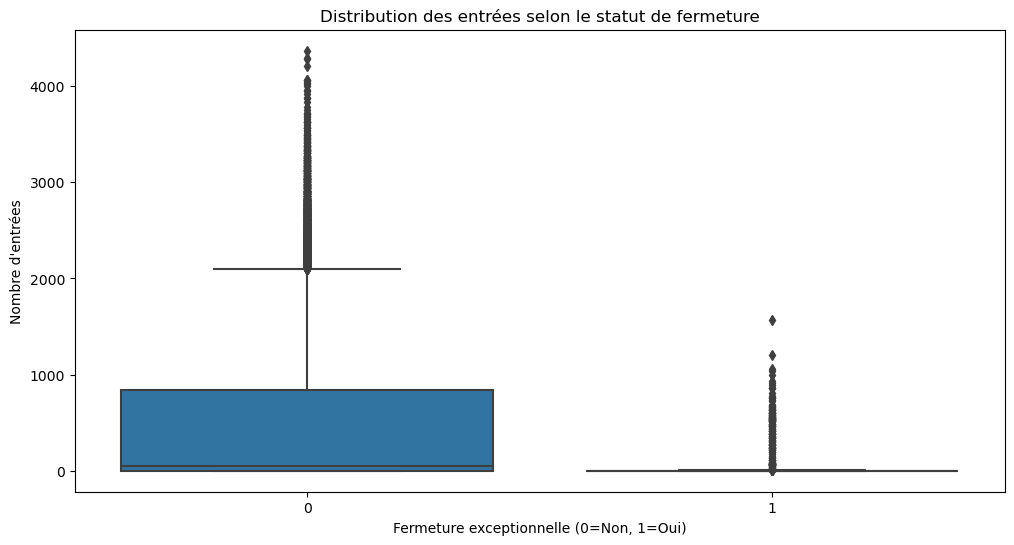

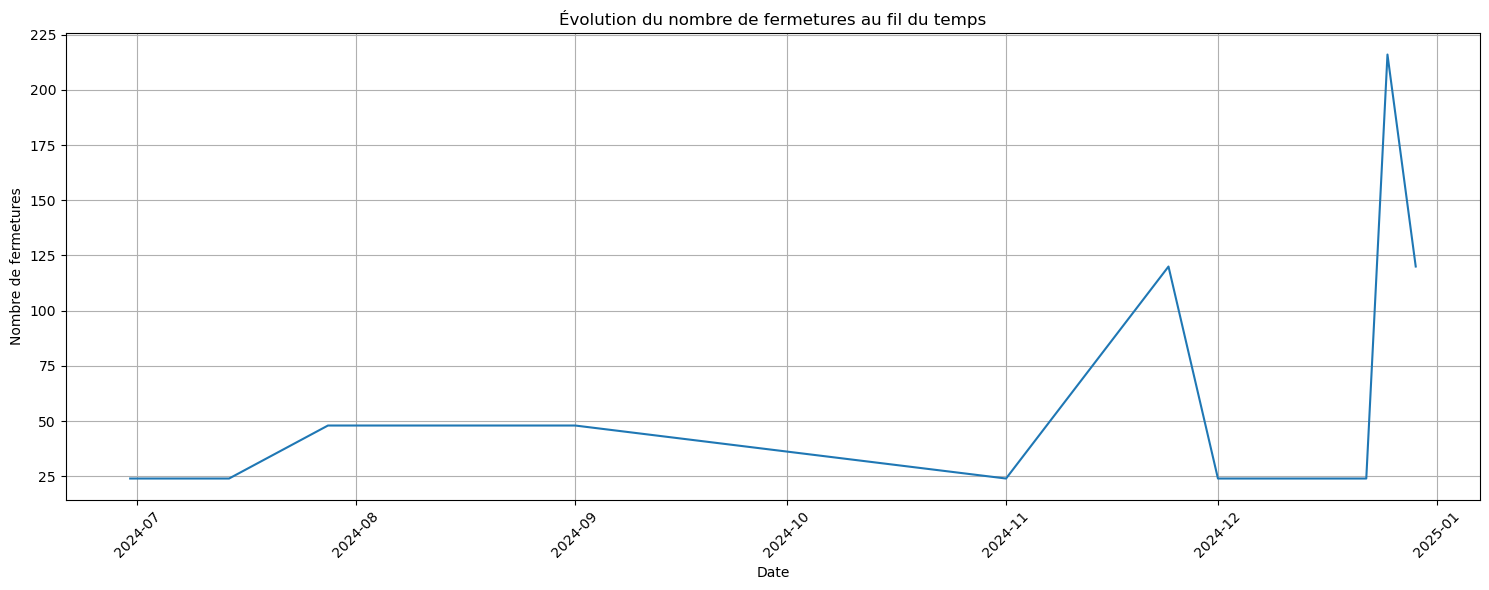


5. CORRÉLATIONS

Matrice de corrélation:
Entrées                    -0.042
fermeture_exceptionnelle    1.000
Année                       0.067
Mois                        0.078
Name: fermeture_exceptionnelle, dtype: float64

6. FERMETURES PAR JOUR DE LA SEMAINE
jour_semaine
Friday        24
Sunday       552
Wednesday    216
dtype: int64

=== RÉSUMÉ DES INSIGHTS PRINCIPAUX ===
1. 792 fermetures exceptionnelles identifiées
2. 9 centres commerciaux différents ont eu des fermetures
3. Moyenne des entrées les jours de fermeture : 80
4. Moyenne des entrées les jours normaux : 442


In [112]:
# Analyse rapide du dataset avec fermetures
print("=== ANALYSE DU DATASET AVEC FERMETURES ===")

# 1. Statistiques générales
print("\n1. STATISTIQUES GÉNÉRALES")
print(f"Nombre total d'observations: {len(flux_avec_fermetures):,}")
print(f"Nombre total de fermetures: {flux_avec_fermetures['fermeture_exceptionnelle'].sum():,}")
print(f"Pourcentage de jours avec fermetures: {(flux_avec_fermetures['fermeture_exceptionnelle'].sum() / len(flux_avec_fermetures) * 100):.2f}%")

# 2. Analyse par centre commercial
print("\n2. ANALYSE PAR CENTRE COMMERCIAL")
analyse_centre = flux_avec_fermetures.groupby('ID mall').agg({
    'fermeture_exceptionnelle': ['count', 'sum'],
    'Entrées': ['mean', 'std']
}).round(2)
analyse_centre.columns = ['total_jours', 'nombre_fermetures', 'moyenne_entrees', 'std_entrees']
analyse_centre['pourcentage_fermetures'] = (analyse_centre['nombre_fermetures'] / analyse_centre['total_jours'] * 100).round(2)
print(analyse_centre.sort_values('nombre_fermetures', ascending=False))

# 3. Analyse temporelle des fermetures
print("\n3. ANALYSE TEMPORELLE DES FERMETURES")
flux_avec_fermetures['Jour'] = pd.to_datetime(flux_avec_fermetures['Jour'])
fermetures_par_mois = flux_avec_fermetures[flux_avec_fermetures['fermeture_exceptionnelle'] == 1].groupby(
    [flux_avec_fermetures['Jour'].dt.year, flux_avec_fermetures['Jour'].dt.month]
).size()
print("\nNombre de fermetures par mois:")
print(fermetures_par_mois)

# 4. Impact sur les entrées
print("\n4. IMPACT SUR LES ENTRÉES")
stats_entrees = flux_avec_fermetures.groupby('fermeture_exceptionnelle')['Entrées'].agg(['mean', 'std', 'count']).round(2)
print("\nStatistiques des entrées selon le statut de fermeture:")
print(stats_entrees)

# 5. Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# 5.1 Distribution des entrées selon le statut de fermeture
plt.figure(figsize=(12, 6))
sns.boxplot(data=flux_avec_fermetures, x='fermeture_exceptionnelle', y='Entrées')
plt.title('Distribution des entrées selon le statut de fermeture')
plt.xlabel('Fermeture exceptionnelle (0=Non, 1=Oui)')
plt.ylabel('Nombre d\'entrées')
plt.show()

# 5.2 Évolution temporelle des fermetures
plt.figure(figsize=(15, 6))
fermetures_quotidiennes = flux_avec_fermetures[flux_avec_fermetures['fermeture_exceptionnelle'] == 1].groupby('Jour').size()
plt.plot(fermetures_quotidiennes.index, fermetures_quotidiennes.values)
plt.title('Évolution du nombre de fermetures au fil du temps')
plt.xlabel('Date')
plt.ylabel('Nombre de fermetures')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Corrélations
print("\n5. CORRÉLATIONS")
correlations = flux_avec_fermetures[['Entrées', 'fermeture_exceptionnelle', 'Année', 'Mois']].corr()
print("\nMatrice de corrélation:")
print(correlations['fermeture_exceptionnelle'].round(3))

# 7. Statistiques par jour de la semaine
flux_avec_fermetures['jour_semaine'] = flux_avec_fermetures['Jour'].dt.day_name()
stats_jour_semaine = flux_avec_fermetures[flux_avec_fermetures['fermeture_exceptionnelle'] == 1].groupby('jour_semaine').size()
print("\n6. FERMETURES PAR JOUR DE LA SEMAINE")
print(stats_jour_semaine)

# 8. Résumé des insights principaux
print("\n=== RÉSUMÉ DES INSIGHTS PRINCIPAUX ===")
print(f"1. {flux_avec_fermetures['fermeture_exceptionnelle'].sum()} fermetures exceptionnelles identifiées")
print(f"2. {len(flux_avec_fermetures[flux_avec_fermetures['fermeture_exceptionnelle'] == 1]['ID mall'].unique())} centres commerciaux différents ont eu des fermetures")
print(f"3. Moyenne des entrées les jours de fermeture : {stats_entrees.loc[1, 'mean']:,.0f}")
print(f"4. Moyenne des entrées les jours normaux : {stats_entrees.loc[0, 'mean']:,.0f}")

=== ENTRÉES DÉTECTÉES PENDANT LES FERMETURES ===

Nombre total de cas : 217

Détails des entrées pendant les fermetures :
             Jour  ID mall              Site  Entrées          heure
175211 2024-12-22       19      Saint Brieuc   1565.0  11:00 - 11:59
175210 2024-12-22       19      Saint Brieuc   1200.0  10:00 - 10:59
154475 2024-08-11       47  Perpignan Claira   1059.0  11:00 - 11:59
51731  2024-11-24       37             Bay 2   1038.0  11:00 - 11:59
51730  2024-11-24       37             Bay 2    999.0  10:00 - 10:59
154307 2024-08-04       47  Perpignan Claira    929.0  11:00 - 11:59
154474 2024-08-11       47  Perpignan Claira    914.0  10:00 - 10:59
175379 2024-12-29       19      Saint Brieuc    894.0  11:00 - 11:59
157840 2024-12-29       47  Perpignan Claira    863.0  16:00 - 16:59
175212 2024-12-22       19      Saint Brieuc    861.0  12:00 - 12:59
157839 2024-12-29       47  Perpignan Claira    858.0  15:00 - 15:59
154139 2024-07-28       47  Perpignan Claira    80

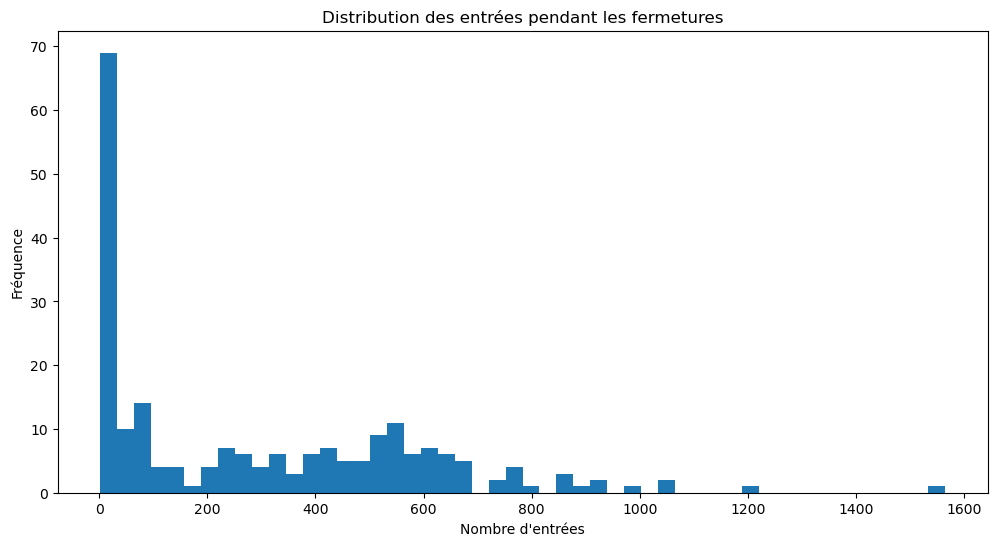

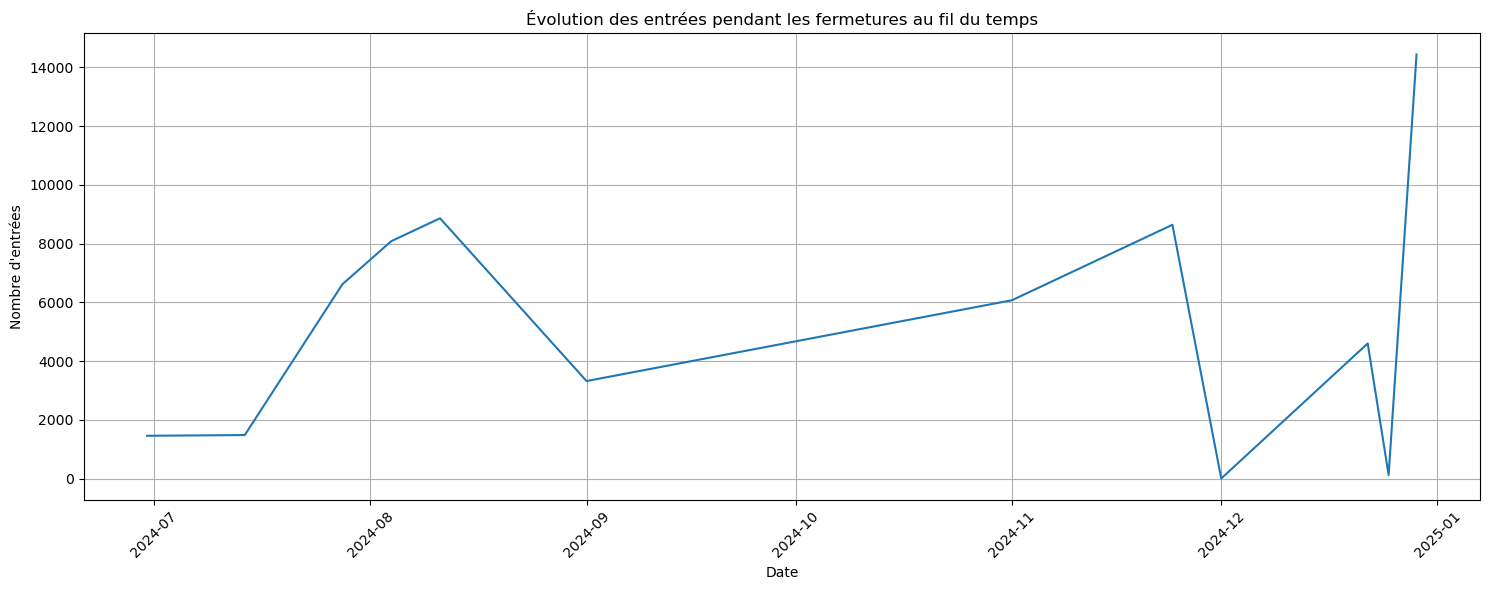


=== RÉSUMÉ DES ANOMALIES PRINCIPALES ===
1. Nombre total de créneaux horaires avec entrées pendant les fermetures : 217
2. Nombre total d'entrées pendant les fermetures : 63,701
3. Moyenne d'entrées par créneau horaire : 294
4. Nombre de centres concernés : 7
5. Centre avec le plus d'entrées pendant les fermetures : 5 (Cesson)


In [113]:
# Filtrer les cas où il y a des entrées pendant les fermetures
entrees_pendant_fermetures = flux_avec_fermetures[
    (flux_avec_fermetures['fermeture_exceptionnelle'] == 1) & 
    (flux_avec_fermetures['Entrées'] > 0)
].copy()

# Trier par nombre d'entrées décroissant
entrees_pendant_fermetures = entrees_pendant_fermetures.sort_values('Entrées', ascending=False)

# Afficher les résultats
print("=== ENTRÉES DÉTECTÉES PENDANT LES FERMETURES ===")
print(f"\nNombre total de cas : {len(entrees_pendant_fermetures)}")

# Afficher les détails
print("\nDétails des entrées pendant les fermetures :")
print(entrees_pendant_fermetures[['Jour', 'ID mall', 'Site', 'Entrées', 'heure']].head(20))

# Statistiques par centre commercial
print("\nStatistiques par centre commercial :")
stats_par_centre = entrees_pendant_fermetures.groupby('ID mall').agg({
    'Entrées': ['count', 'sum', 'mean'],
    'Site': 'first'  # Pour avoir le nom du site
}).round(2)
stats_par_centre.columns = ['nombre_cas', 'total_entrees', 'moyenne_entrees', 'nom_site']
print(stats_par_centre.sort_values('total_entrees', ascending=False))

# Distribution horaire
print("\nDistribution horaire des entrées pendant les fermetures :")
stats_horaires = entrees_pendant_fermetures.groupby('heure')['Entrées'].agg(['count', 'sum', 'mean']).round(2)
print(stats_horaires.sort_values('sum', ascending=False))

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution des entrées pendant les fermetures
plt.figure(figsize=(12, 6))
plt.hist(entrees_pendant_fermetures['Entrées'], bins=50)
plt.title('Distribution des entrées pendant les fermetures')
plt.xlabel('Nombre d\'entrées')
plt.ylabel('Fréquence')
plt.show()

# Évolution temporelle
plt.figure(figsize=(15, 6))
entrees_pendant_fermetures['Jour'] = pd.to_datetime(entrees_pendant_fermetures['Jour'])
entrees_quotidiennes = entrees_pendant_fermetures.groupby('Jour')['Entrées'].sum()
plt.plot(entrees_quotidiennes.index, entrees_quotidiennes.values)
plt.title('Évolution des entrées pendant les fermetures au fil du temps')
plt.xlabel('Date')
plt.ylabel('Nombre d\'entrées')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Résumé des anomalies principales
print("\n=== RÉSUMÉ DES ANOMALIES PRINCIPALES ===")
print(f"1. Nombre total de créneaux horaires avec entrées pendant les fermetures : {len(entrees_pendant_fermetures)}")
print(f"2. Nombre total d'entrées pendant les fermetures : {entrees_pendant_fermetures['Entrées'].sum():,.0f}")
print(f"3. Moyenne d'entrées par créneau horaire : {entrees_pendant_fermetures['Entrées'].mean():,.0f}")
print(f"4. Nombre de centres concernés : {len(stats_par_centre)}")
print(f"5. Centre avec le plus d'entrées pendant les fermetures : {stats_par_centre.iloc[0].name} ({stats_par_centre.iloc[0]['nom_site']})")

Ouvertures exceptionnelles

In [114]:
# Load the dataset
df_ouvertures = pd.read_excel(files["Ouvertures_Exceptionnelles"])

In [118]:
# Afficher les informations sur le DataFrame
print("\n=== Information sur le DataFrame ===")
print(df_ouvertures.info())

# Afficher les premières lignes
print("\n=== Premières lignes du DataFrame ===")
print(df_ouvertures.head())

# Afficher les noms des colonnes
print("\n=== Noms des colonnes ===")
print(df_ouvertures.columns.tolist())
print(df_ouvertures.info())

# Afficher les premières lignes
print("\n=== Premières lignes du DataFrame ===")
print(df_ouvertures.head())


=== Information sur le DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Centre                 137 non-null    object 
 1   Mall ID                77 non-null     float64
 2   Clef Hyper Carrefour   75 non-null     object 
 3   2024-11-01 00:00:00    91 non-null     object 
 4   2024-11-11 00:00:00    89 non-null     object 
 5   2024-12-01 00:00:00    88 non-null     object 
 6   2024-12-08 00:00:00    87 non-null     object 
 7   2024-12-15 00:00:00    85 non-null     object 
 8   2024-12-22 00:00:00    79 non-null     object 
 9   2024-12-24 00:00:00    53 non-null     object 
 10  2024-12-29 00:00:00    43 non-null     object 
 11  2024-12-31 00:00:00    34 non-null     object 
 12  2025-01-12 00:00:00    21 non-null     object 
 13  2025-04-21 00:00:00    10 non-null     object 
 14  2025-05-08 00:00:00 

In [119]:
# Compter le nombre de fermetures par centre
ouvertures_par_centre = df_ouvertures.groupby('Centre').size().sort_values(ascending=False)
print("\n=== Nombre d'ouvertures par centre ===")
print(ouvertures_par_centre)


=== Nombre d'ouvertures par centre ===
Centre
 Centre commercial Carrefour Brest                     1
Centre commercial Carrefour Angoulins                  1
Centre Commercial Orléans Place d&#039;Arc             1
Centre Commercial Pince-Vent                           1
Centre Commercial Villejuif 7                          1
                                                      ..
Centre Commercial Carrefour Grenoble Meylan            1
Centre Commercial Carrefour Grenoble Echirolles        1
Centre Commercial Carrefour Grenoble - Saint-Egrève    1
Centre Commercial Carrefour Grand Vitrolles            1
Shop&#039;in Witty                                     1
Length: 137, dtype: int64


In [120]:
# Identifier les centres sans ouverutures (si nous avons une liste complète des centres)
# Note: Cette partie suppose que nous avons une colonne 'Centre' avec tous les centres possibles
tous_les_centres = df_ouvertures['Centre'].unique()
print("\n=== Liste de tous les centres ===")
print(tous_les_centres)


=== Liste de tous les centres ===
['Centre commercial Carrefour Lescar'
 'Centre commercial Carrefour Chambourcy'
 'Centre commercial Carrefour l&#039;Escapade'
 'Centre commercial Carrefour Rennes Cesson'
 'Centre Commercial Carrefour Douai Flers'
 'Centre Commercial Carrefour Annecy'
 'Centre Commercial Carrefour l&#039;Isle d&#039;Abeau'
 'Centre Commercial Carrefour Montesson'
 'Centre commercial Carrefour Nice Lingostière'
 'Centre commercial Carrefour Francheville'
 'Centre commercial Carrefour Villabé'
 'Centre commercial Carrefour Angoulins'
 'Centre commercial Les Sept Chemins' 'Centre Commercial Villejuif 7'
 'Centre commercial Cap Saran - Orléans'
 'Centre commercial Carrefour Salaise-sur-Sanne'
 'Centre Commercial Carrefour Langueux - Saint-Brieuc'
 'Centre Commercial Carrefour Cholet'
 'Centre Commercial Carrefour Angers - Saint-Serge'
 'Centre Commercial Carrefour Grenoble - Saint-Egrève'
 'Centre commercial Carrefour Bassens'
 'Centre Commercial Carrefour Hérouville'
 '

2. Nettoyage et pré-traitement

In [121]:
# Afficher les colonnes et leurs types
print("=== Liste des colonnes ===")
print(df_ouvertures.columns.tolist())
print("\n=== Types des colonnes ===")
print(df_ouvertures.dtypes)

# Afficher quelques lignes pour voir le format
print("\n=== Exemple de données ===")
print(df_ouvertures.head())


=== Liste des colonnes ===
['Centre', 'Mall ID', 'Clef Hyper Carrefour', datetime.datetime(2024, 11, 1, 0, 0), datetime.datetime(2024, 11, 11, 0, 0), datetime.datetime(2024, 12, 1, 0, 0), datetime.datetime(2024, 12, 8, 0, 0), datetime.datetime(2024, 12, 15, 0, 0), datetime.datetime(2024, 12, 22, 0, 0), datetime.datetime(2024, 12, 24, 0, 0), datetime.datetime(2024, 12, 29, 0, 0), datetime.datetime(2024, 12, 31, 0, 0), datetime.datetime(2025, 1, 12, 0, 0), datetime.datetime(2025, 4, 21, 0, 0), datetime.datetime(2025, 5, 8, 0, 0), datetime.datetime(2024, 5, 29, 0, 0), datetime.datetime(2025, 6, 9, 0, 0), datetime.datetime(2025, 7, 14, 0, 0), datetime.datetime(2025, 8, 15, 0, 0), datetime.datetime(2025, 11, 1, 0, 0), datetime.datetime(2025, 11, 11, 0, 0), datetime.datetime(2025, 11, 30, 0, 0), datetime.datetime(2025, 12, 7, 0, 0), datetime.datetime(2025, 12, 14, 0, 0), datetime.datetime(2025, 12, 21, 0, 0), datetime.datetime(2025, 12, 28, 0, 0), datetime.datetime(2024, 12, 26, 0, 0), datet